### Modelos no Supervisados



Curso Especialización en Big Data. Expert

En la siguiente asignación encontrará un dataset en relación a un conjunto de datos de canciones de la plataforma spotify, en la que se inclueyen varias caracteristicas de las canciones : acousticness, artists,danceability, danceability, duration_ms	, instrumentalness, loudness, popularity, entre otras.

Se realiza una inspección inicial de los datos, posteriormente una isnpección de cada una de las caracteristicas, posterior a esto un proceso de correlaciones entre las caracteristicas, creación de tablas pivote y gráficos para analizar la información y finalmente la aplicación de Modelo No Supervisado para crear Clusters.

Importación de las bibliotecas para el desarrollo del análisis del data set y transformaciones necesarias, asì como el trato de la data por medio de los modelos necesarios, análisis descriptivo, inferencial y modelos No surpoervisados

In [2]:
# Importacion de bibliotecas

import argparse # Biblioteca para crear enlaces entre interfaces y mantener estructuras de datos 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # Normalizador de datos
from sklearn.preprocessing import MinMaxScaler # Normalizador de minimos
from sklearn.decomposition import PCA # Biblioteca de componentes principales
from sklearn.cluster import KMeans # K-medias
import seaborn as sns
from kneed import KneeLocator # Biblioteca que permite pintar puntos de inflexion en funciones (Elbow Method)
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
sns.set()

In [1]:
pip install Kneed

2.IMPORTACION DEL DATASET


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Sets/Songs.csv')

3.Exploración Inicial del DATASET Songs

In [4]:
data

acousticness                             artists  ...  valence  year
0           0.991000                     ['Mamie Smith']  ...   0.6340  1920
1           0.643000           ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2           0.993000                     ['Mamie Smith']  ...   0.6890  1920
3           0.000173                 ['Oscar Velazquez']  ...   0.0422  1920
4           0.295000                            ['Mixe']  ...   0.2990  1920
...              ...                                 ...  ...      ...   ...
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']  ...   0.1860  2020
174385      0.795000                    ['Alessia Cara']  ...   0.2280  2021
174386      0.806000                       ['Roger Fly']  ...   0.7140  2020
174387      0.920000                    ['Taylor Swift']  ...   0.3200  2021
174388      0.239000                       ['Roger Fly']  ...   0.7470  2020

[174389 rows x 19 columns]

El dataset se compone de 19 caracteristicas y 174389 observaciones

In [5]:
data.head(5)

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

De que trata el dataset Songs

In [6]:
# comprende un listado de las canciones que han sido escuchadas o sintonizadas por los usuarios
# por lo que se desea utilizar información del dataset para generar campañas dirigidas por los 
# diferentes segmentos que puedan ser identificados por medio del estudio y análisis de la información

Descripción de las características

**acousticness**: Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica. La distribución de valores para esta característica se ve así: Distribución de la acústica

**artists**: el interprete o banda que canta la canción

**danceability**: La capacidad de baile describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable. La distribución de valores para esta característica se ve así: Distribución de la capacidad de baile

**duration_ms**: La duración de la pista en milisegundos.

**energy**: La energía es una medida de 0.0 a 1.0 y representa una medida de percepción de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala.

**explicit**: indica si la canción presenta contenido explicito. 0 = No explicit content, 1 = Explicit content.

**id**: El ID de Spotify de la pista.

**instrumentalness**: Predice si una pista no contiene voces. Los sonidos “Ooh” y “aah” se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

**key**: La clave general estimada de la pista. Los enteros se asignan a los tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C♯ / D ♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.

**liveness**: Detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

**loudness**: El volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicos oscilan entre -60 y 0 db.

**mode**: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0

**name**: nombre de la canción

**popularity**: La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán una mayor popularidad que las canciones que se tocaron mucho en el pasado.

**release_date**:  Fecha de publicación principalmente en formato aaaa-mm-dd, sin embargo, la precisión de la fecha puede variar.

**speechiness**: detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida a un discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap.

**tempo**: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media del tiempo.

**valence**: Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, feliz, alegre, eufórico), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, triste, deprimido, enojado).

**year**: Año de lanzamiento de la canción

Revisión para determinar si existen datos nulos

In [7]:
data.isnull().sum()    # según la revisión no parecen existir datos nulo o con problemas

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Verificar el tipo de datos que conforman el dataset

In [8]:
data.dtypes     # tenemos caracteristicas numéricas y de tipo objeto. se debe proceder a determinar cuales se deben usar

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [9]:
data.info()  # tenemos caracteristicas numéricas y de tipo objeto. se debe proceder a determinar cuales se deben usar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [10]:
data.nunique()   # Verificación de datos unicos por caracteristicas.

acousticness          4929
artists              36195
danceability          1233
duration_ms          56306
energy                2306
explicit                 2
id                  172230
instrumentalness      5400
key                     12
liveness              1740
loudness             25580
mode                     2
name                137013
popularity              98
release_date         11043
speechiness           1633
tempo                84123
valence               1707
year                   102
dtype: int64

In [11]:
# Comprobando si hay datos duplicados

data.duplicated().sum()

2159

Se aprecia las caracteristicas explicit, mode, corresponden a carateristicas booleanas "binarias".  Además la caracteristica key corresponde a una valoración o calificación a las canciones que se pueden agrupar en 12 tipos distintos. 
Según lo aportado en el la investigación previa e indicaciones del cliente, a caracteristica Key y Mode aplican unicamente para Estados Unidos (USA)

In [12]:
datos = data.copy()   #se realiza una copia del dataset

In [13]:
datos.size

3313391

Proceso aplicado en la caracteristica de Artist

In [14]:
datos['artists']

0                            ['Mamie Smith']
1                  ["Screamin' Jay Hawkins"]
2                            ['Mamie Smith']
3                        ['Oscar Velazquez']
4                                   ['Mixe']
                         ...                
174384    ['DJ Combo', 'Sander-7', 'Tony T']
174385                      ['Alessia Cara']
174386                         ['Roger Fly']
174387                      ['Taylor Swift']
174388                         ['Roger Fly']
Name: artists, Length: 174389, dtype: object

In [15]:
datos['artists'] = datos['artists'].str.replace('[',"")  # esos simbolos difiultan la lectura de la información, vamos a quitar el exceso de simbolos
datos['artists'] = datos['artists'].str.replace(']',"")
datos['artists'] = datos['artists'].str.replace("'","")
datos['artists'] = datos['artists'].str.replace('"',"")

Revisión de la caracteristica release_date

In [16]:
datos['release_date']  

0               1920
1         1920-01-05
2               1920
3         1920-01-01
4         1920-10-01
             ...    
174384    2020-12-25
174385    2021-01-22
174386    2020-12-09
174387    2021-01-07
174388    2020-12-09
Name: release_date, Length: 174389, dtype: object

In [17]:
100 * datos['release_date'].value_counts() / len(datos['release_date'])

1945          0.829754
1949          0.707613
1948          0.672061
1935          0.633641
1926          0.607263
                ...   
1999-05-05    0.000573
1950-10-30    0.000573
1989-01-11    0.000573
1997-04-29    0.000573
1964-09-15    0.000573
Name: release_date, Length: 11043, dtype: float64

In [18]:
datos.groupby(['release_date']).size()

release_date
1920          130
1920-01-01     96
1920-01-03     12
1920-01-04     41
1920-01-05      1
             ... 
2021-01-19     22
2021-01-20     43
2021-01-21     19
2021-01-22    664
2021-01-23     37
Length: 11043, dtype: int64

In [19]:
datos['release_date'].isnull().sum()   # para efectos de fechas y demás se va  a trabajar con la ccaracteristica year
                                      # en vista que algunas de las fechas se encuentran incompletas.
                                      # ademas para efectos de estudio el año de lanzamiento es suficiente para el análisis

0

Gneración de una copia de datos con las características de interes

In [20]:
datos1 = datos.iloc[:,[0,2,3,4,5,7,9,10,13,15,16,17,18]] # un data set sin las caractetisticas Artist,Mode, Key, ID, release_date, ademas se quita la 
                                             # mas adelante se extraerá tambien la caracteristica name "nombre de la canción"
                                             # cuadno se requiera hacer manipulación de caracteristicas exclusivamente numéricas

In [21]:
datos1.head(2)  #  datos1 corresponde a un dataset tratado sin incluir unas caracteristicas, para procesos más adelante
                # para los cuales las caracteristicas dejadas de lado no tienen interes.

acousticness  danceability  duration_ms  ...    tempo  valence  year
0         0.991         0.598       168333  ...  149.976    0.634  1920
1         0.643         0.852       150200  ...   86.889    0.950  1920

[2 rows x 13 columns]

In [22]:
datos1.groupby(['year']).sum() # visualización de las caracteristicas unicamente tratables para el caso de estudio.
                               # agrupadas por el año de creación.

acousticness  danceability  ...       tempo     valence
year                              ...                        
1920    220.303550      179.9968  ...   39516.188   173.87530
1921    134.488400       67.4186  ...   15978.362    59.01100
1922    100.301000       69.6500  ...   12104.011    69.11400
1923    177.090656      106.8080  ...   21091.985   115.71610
1924    221.887167      129.7750  ...   28482.739   156.63920
...            ...           ...  ...         ...         ...
2017    447.182952     1251.5045  ...  262665.063   940.69165
2018    634.631270     1635.8117  ...  335570.598  1157.70103
2019    608.670884     1404.6232  ...  285115.487  1066.24692
2020    868.689733     2599.0954  ...  532706.375  2009.72123
2021    626.066216     1200.5786  ...  221767.610   831.51110

[102 rows x 12 columns]

##Analisis Exploratorio (EDA) de las Caracteristicas 

1.Analisis Exploratorio de la Caracteristica **acousticness**     



acousticness: Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica. La distribución de valores para esta característica se ve así: Distribución de la acústica

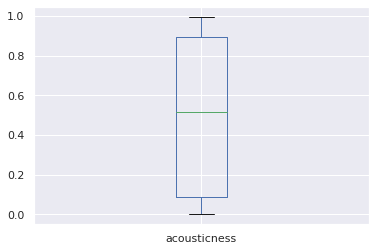

In [23]:
datos ['acousticness'].plot(kind='box')  # la mediana es de alrededor de 0.5, el primer quartil (25%) corresponde a 0.0877
plt.show()                               # no se observan valores atipicos.

In [24]:
datos['acousticness'].quantile(0.25)    # el primer quartil indica que el 25% de los datos presenta un valor de  acousticness menor o igual


0.0877

In [25]:
datos['acousticness'].quantile(0.5)   # el 50% de los datos son mayor o igual a 0.517 en la caracteristica de acousticness

0.517

In [26]:
datos['acousticness'].quantile(0.75)  # el 75% de los datos son menor o igual a 0.895 en la caracteristica de acousticness

0.895

Histograma de la caracteristica 

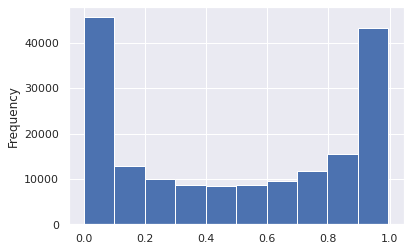

In [27]:
datos['acousticness'].plot.hist();    # distribución asimetrica con forma de U

Medidas de tendencia central y otros valores de relevancia en el análisis

In [28]:
datos['acousticness'].min()  # el valor mínimo en la caracteristica corresponde a 0

0.0

In [29]:
datos['acousticness'].max()  # el valo más alto en la caracteristica corresponde a 0.996

0.996

In [30]:
datos['acousticness'].mode() # el valor que más veces se presenta corresponde a 0.995

0    0.995
dtype: float64

In [31]:
datos['acousticness'].median()  # la mediana de la caracteristica es de 0.517 nos indica que el 50% de los datos está por debajo de ese valor 
                                # y el restante 50% son mayores o iguales a 0.517

0.517

In [32]:
datos['acousticness'].mean()    # la media nos indica que en promedio el valor en acoustiness en las canciones corresponde a 0.4992

0.49922848176599677

In [33]:
datos['acousticness'].std()     # la desviancion estandar de la caracteristica es de 0.3799 lo que indica que los datos se alejan
                                # del promedio en 0.3799

0.3799358418737203

2.Analisis Exploratorio de la Caracteristica artists           

**artists**: el interprete o banda que canta la canción

In [34]:
datos['artists'].mode()   # este tipo de carcteristica es el nombre del artista, no veo opción de algo práctico el 
                          # convertir el nombre a valor numérico.
                          # el artistita que aparece más veces corresponde a Tadeusz Dolega Mostowicz

0    Tadeusz Dolega Mostowicz
dtype: object

In [35]:
datos["artists"].value_counts()

Tadeusz Dolega Mostowicz    1281
Эрнест Хемингуэй            1175
Эрих Мария Ремарк           1062
Francisco Canaro             951
Ignacio Corsini              624
                            ... 
SINthetik Messiah              1
Bumblebee Unlimited            1
Meena Banerjee                 1
Reptile Planet                 1
Milan Babić                    1
Name: artists, Length: 36193, dtype: int64

In [36]:
datos.duplicated('artists').sum()

138196

In [37]:
# Importar biblioteca de extensiones
import re # Biblioteca de expresiones regulares
import collections # Biblioteca de estadísticas de frecuencia de palabras
import jieba # Participio tartamudo
from wordcloud import WordCloud # Word Cloud Display Library
from PIL import Image # Biblioteca de procesamiento de imágenes

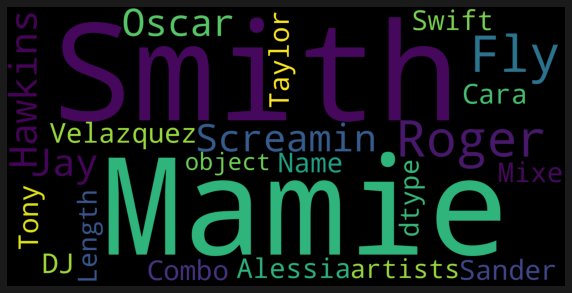

In [38]:
text1 = datos['artists']                                      #Representación gráfica de nombres de artistas que figuran en el dataset
WordCloud = WordCloud(width=1600, height=800).generate(str(text1))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

3.Analisis Exploratorio de la Caracteristica **danceability**

danceability: Esta caracteristica describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.

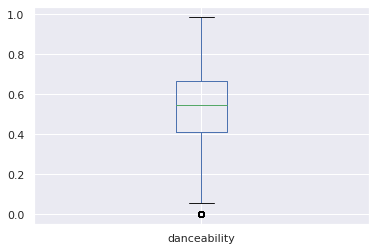

In [39]:
datos ['danceability'].plot(kind='box')             # se realiza un gráfico de  boxplot  la mediana ronda los 0.54
plt.show()                                          # el valor mínimo sobre cero y el tercer quartil a 0.66

In [40]:
datos['danceability'].quantile(0.25)     # primer quartil indica que un 25% de los datos es menor o igual a 0.414 en la caracteristica danceability

0.414

In [41]:
datos['danceability'].quantile(0.5)       # el segundo quartil indica que el 50% de las canciones presenta un valor de danceability menor o igual a 0.5479

0.5479999999999999

In [42]:
datos['danceability'].quantile(0.75)      # el tercer quartil  75% indica que el 75% de las canciones presentan un valor menor o igual a 0.669 en daceability

0.669

Histograma de la Caracteristica danceability

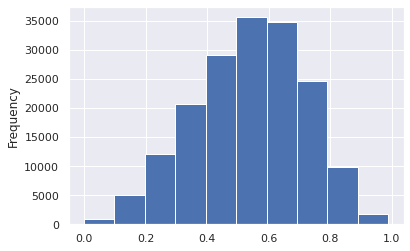

In [43]:
datos['danceability'].plot.hist();                    # se observa una ditribución con un ainclinación negativa 

Medidas de tendencia central y otros valores de relevancia en el análisis

In [44]:
datos['danceability'].min()    # el valor mínimo en la cataracteristica es de cero

0.0

In [45]:
datos['danceability'].max()    # el valor más alto en danceability es de 0.988

0.988

In [46]:
datos['danceability'].mode()   # el valor más repetido es de 0.565

0    0.565
dtype: float64

In [47]:
datos['danceability'].median()   # la mediana es de un valor 0.5479 lo que indica que el 50% de las canciones presenta un valor de menor o igual a 0.5479 en danceability

0.5479999999999999

In [48]:
datos['danceability'].mean()  # el valor promedio que presentan las canciones en la caracteristica danceability es de 0.5367

0.5367575873478169

In [49]:
datos['danceability'].std()   # la desviación estandar indica que los valores en danceability se alejan en 0.176 del promedio

0.1760252546843174

4.Analisis Exploratorio de la Caracteristica duration_ms

duration_ms: La duración de la pista en milisegundos.

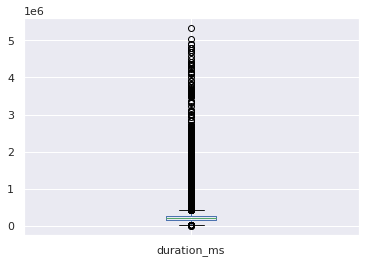

In [50]:
datos ['duration_ms'].plot(kind='box')              # Se observa una gran cantidad de valores atípicos
plt.show()

In [51]:
datos['duration_ms'].quantile(0.25)              # el primer cuartil indica que el 25% de las canciones presenta un valor menor o igual a 166133 en duration

166133.0

In [52]:
datos['duration_ms'].quantile(0.5)  # el segundo cuartil indica que el 50% de las canciones presenta un valor menor o igual a 205787

205787.0

In [53]:
datos['duration_ms'].quantile(0.75)  # el valor del quartil (0.75) indica que el 75% de las canciones presentan un valor menor o igual a 265 720 e duration ms

265720.0

Histograma de la caracteristica  duration_ms

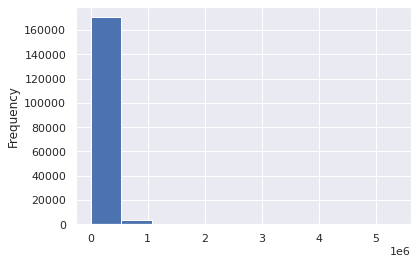

In [54]:
datos['duration_ms'].plot.hist();      #una distribución totalmente que muestra una inclinación positiva

Medidas de tendencia central y otros valores de relevancia en el análisis

In [55]:
datos['duration_ms'].min()    # el valor más bajo corresponde a 4937 en duration ms

4937

In [56]:
datos['duration_ms'].max()  # la duración maxima de las canciones es de 5338302 

5338302

In [57]:
datos['duration_ms'].mode()  # se presentan dos modas, los valoes más presentes corresponde a 150000 y 180000

0    150000
1    180000
dtype: int64

In [58]:
datos['duration_ms'].median()  # la mediana de la duration ms de la canciones corresponde a 205787 , el 50% tiene una duración menor o igual a 205787

205787.0

In [59]:
datos['duration_ms'].mean()  # la duracion promedio de las canciones corresponde a 232810

232810.03202610256

In [60]:
datos['duration_ms'].std()   # la desviacion estandar indica que la duracion de las canciones se alejan en 148395.79 del promedio

148395.79767999132

5.Analisis Exploratorio de la Caracteristica energy

energy: La energía es una medida de 0.0 a 1.0 y representa una medida de percepción de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas 

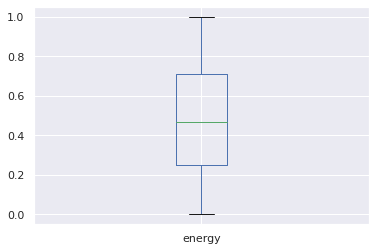

In [61]:
datos ['energy'].plot(kind='box')          #  no se observan valores atípicos , el valor mínimo ronda el valor cero, la media alrededor de 0.46
plt.show()

In [62]:
datos['energy'].quantile(0.25)   # el cuartil 0.25, indica que el 255 de las canciones presentan un valor menor igual a 0.249 en caracteristica energy

0.249

In [63]:
datos['energy'].quantile(0.5)  # el cuartil (0.5) indica que el 50% de las canciones presentan un valor de energy menor o igual a 0.465

0.465

In [64]:
datos['energy'].quantile(0.75)  # el cuartil 0.75 indica que el 75% de las canciones presentan un valor de energy menor o igual a 0.711

0.711

Histograma de la caracteristica  Energy

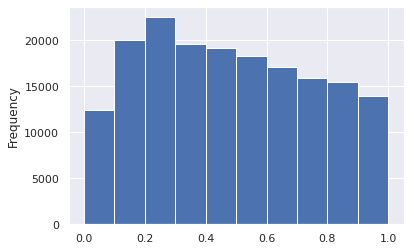

In [65]:
datos['energy'].plot.hist();  # se observa una distribución con inclinación positiva

Medidas de tendencia central y otros valores de relevancia en el análisis

In [66]:
datos['energy'].min() # el valor más bajo es cero 

0.0

In [67]:
datos['energy'].max()  # el valor más alto es de 1 

1.0

In [68]:
datos['energy'].mode()  # el valor que más se repite corresponde a 0.195

0    0.195
dtype: float64

In [69]:
datos['energy'].median()  # la mediana en el energy indica que el 50% de las canciones 

0.465

In [70]:
datos['energy'].mean()  # el valor promedio de la caracteristica energy es de 0.4827

0.4827208433255605

In [71]:
datos['energy'].std()  # las canciones se alejan del valor promedio en un 0.272 según la desviacion estandar

0.2726854798927745

6.Analisis Exploratorio de la Caracteristica explicit

explicit: indica si la canción presenta contenido explicito. 0 = No explicit content, 1 = Explicit content.

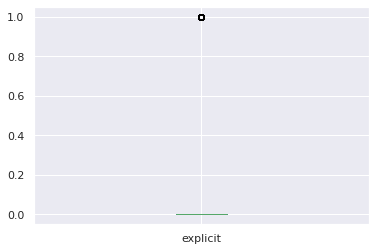

In [72]:
datos ['explicit'].plot(kind='box')     # esta caracteristica corresponde a un binario, o es sí o no, en contenido explicito
plt.show()

In [73]:
datos['explicit'].mode()   # la mayor cantidad de canciones presentan la caracteristica de no explicit, según se observa por el valor de la moda
                          # siendo 0 el valor más repetido en el dataset

0    0
dtype: int64

7.Analisis Exploratorio de la Caracteristica id

id: El ID de Spotify de la pista, con patrones alfanumericos

Esta caracteristica es un ID asignado por la plataforma a las canciones, no permite mucha exploración de datos.

In [74]:
datos['id'].mode()  # se calcula la moda para determinar los ID mas aparecen

0    0UsmyJDsst2xhX1ZiFF3JW
1    1xQvPFljQXA3GCK869ERvC
2    7tJS1cjSD1P8bodNGblYiK
dtype: object

In [75]:
data.groupby(['id']).size()

id
000G1xMMuwxNHmwVsBdtj1    1
000Npgk5e2SgwGaIsN3ztv    1
000ZxLGm7jDlWCHtcXSeBe    1
000jBcNljWTnyjB4YO7ojf    1
000mGrJNc2GAgQdMESdgEc    1
                         ..
7zxv7kFipfmvpDiC1eU4Fb    1
7zyMIkp9d6JIu368q6PL2U    1
7zzbPkvxJ6iANIxcSz60rm    1
7zzbfi8fvHe6hm342GcNYl    1
7zzuPsjj9L3M7ikqGmjN0D    1
Length: 172230, dtype: int64

Esta Característica no presenta un valor que sea tratable para el análisis, corresponde a un ID que le asigna Spotify.

8.Analisis Exploratorio de la Caracteristica instrumentalness

**instrumentalness**: Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal

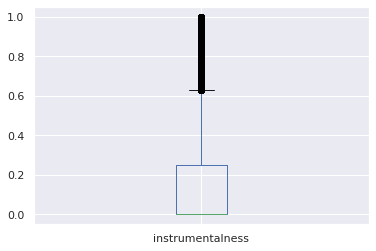

In [76]:
datos ['instrumentalness'].plot(kind='box')        # se oberva la presencia de datos atípicos, el valor más bajo es de cero
plt.show()

In [77]:
datos['instrumentalness'].quantile(0.25)  # el 25% de las canciones presentan el valor de cero

0.0

In [78]:
datos['instrumentalness'].quantile(0.5)   # el cuartil (0.5) indica que el 50% de las canciones presenta un valor menor o igual a 0.000524

0.000524

In [79]:
datos['instrumentalness'].quantile(0.75)  # el cuartil (0.75) indica que el 75% de las canciones presenta un valor de instrumentalness menor o igual a 0.252

0.252

Histograma de la caracteristica  **instrumentalness**

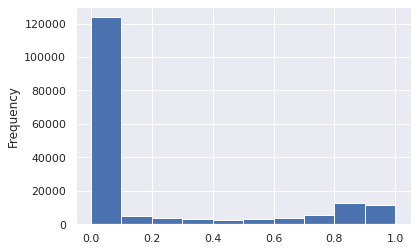

In [80]:
datos['instrumentalness'].plot.hist();    # se observa una distribución con un compartamiento de asimetria positiva

Medidas de tendencia central y otros valores de relevancia en el análisis

In [81]:
datos['instrumentalness'].min()  # el valor mínimo es de cero

0.0

In [82]:
datos['instrumentalness'].max()  # el valor máximo en la caracteristica es de 1

1.0

In [83]:
datos['instrumentalness'].mode()  # el valor que más se repite es cro 0

0    0.0
dtype: float64

In [84]:
datos['instrumentalness'].median()   # el valor de la mediana es de 0.000524 indica que el 50% de las canciones presentan un valor de instrumentalness
                                     # menor o igual a 0.000524

0.000524

In [85]:
datos['instrumentalness'].mean()   # el valor promedio de la caracteristica corresponde a 0.19725

0.1972520469270387

In [86]:
datos['instrumentalness'].std()   # la desviación estandar nos indica que los valores en esta caracteristica se alejan del promedio en 0.33457

0.33457370534548025

9.Analisis Exploratorio de la Caracteristica key

**key**: La clave general estimada de la pista. Los enteros se asignan a los tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C♯ / D ♭, 2 = D
                 **influye unicamente a aquellas del mercado USA. para el analisis completo se excluye*

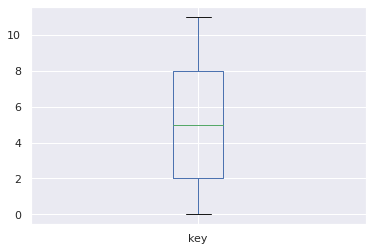

In [87]:
datos ['key'].plot(kind='box')      # se muestra el valor mínimo de cero 0, valor promedio de alrededor de 5
plt.show()

In [88]:
datos['key'].quantile(0.25) # el primer cuartil indica que el 25% de las canciones* presenta un valor menor o igual a 2
                            # *influye unicamente a aquellas del mercado USA. para el analisis completo se excluye

2.0

In [89]:
datos['key'].quantile(0.5)  # el segundo cuartil nos indica que el 50% de las canciones presentan un valor menor o igual a 5

5.0

In [90]:
datos['key'].quantile(0.75) # tercer cuartil indica que el 75% de las canciones presenta un valor menor o igual a 8

8.0

Histograma de la caracteristica  **Key**

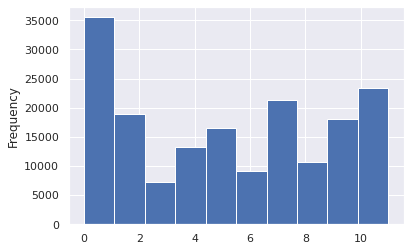

In [91]:
datos['key'].plot.hist();    # vemos una distribucón no definida claramente con alguna simetría

Medidas de tendencia central y otros valores de relevancia en el análisis

In [92]:
datos['key'].min()  # el valor más bajo es de cero 0

0

In [93]:
datos['key'].max()  # el valor más alto es de 11

11

In [94]:
datos['key'].mode()  # el valor más repetido es cero 0

0    0
dtype: int64

In [95]:
datos['key'].median()  # la mediana indica que el 50% de los datos presenta un valor menor o igual a 5 

5.0

In [96]:
datos['key'].mean()   # el valor promedio de la caracteristica key es de  5.20

5.205305380499917

In [97]:
datos['key'].std()  # la desviacion estandar nos indica que los valores se alejan del promedio en 3.518

3.5182918081970445

10.Analisis Exploratorio de la Caracteristica liveness

 **liveness**: Detecta la presencia de una audiencia en la grabación.

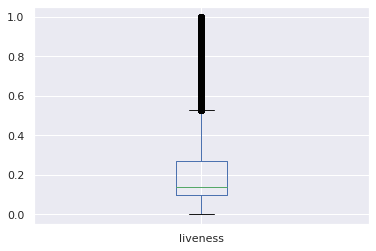

In [98]:
datos ['liveness'].plot(kind='box')    # esta caracteristica presenta muchos valores atípicos
plt.show()                             # el valor más bajo corresponde a 0 y un valor de la mediana de alrededor de  1.3

In [99]:
datos['liveness'].quantile(0.25)   # el cuartil (0.25) nos indica que el 25% de los datos presenta un valor menor o igual a 0.0992

0.0992

In [100]:
datos['liveness'].quantile(0.5)  # el segundo cuartil nos indica que el 50% de las canciones presenta un valor menor o igual a 0.138 en liveness

0.138

In [101]:
datos['liveness'].quantile(0.75)   # el tercer cuartil nos indica que el 75% de las canciones presentan un valor menor o igual a 0.27

0.27

Histograma de la caracteristica  **liveness**

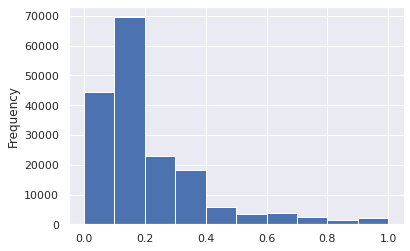

In [102]:
datos['liveness'].plot.hist();   # presenta una distribución con comportamiento positivo (agrupamiento hacia la izquierda)

Medidas de tendencia central y otros valores de relevancia en el análisis


In [103]:
datos['liveness'].min()    # el valor más bajo que aparece es de cero 0

0.0

In [104]:
datos['liveness'].max()  # el valor más alto es de 1

1.0

In [105]:
datos['liveness'].median()  # el valor de la mediana indica que el 50% de las canciones presenta un valor menor o igual a 0.138

0.138

In [106]:
datos['liveness'].mean()  # el valor promedio de la caracteristica liveness es de 0.2111

0.2111231446364156

In [107]:
datos['liveness'].std()  # la desviacion estandar nos indica que los valores en esta caracteristica se van a alejar del promedio en 0.1804

0.18049271486241986

11.Analisis Exploratorio de la Caracteristica loudness

**loudness**: El volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas

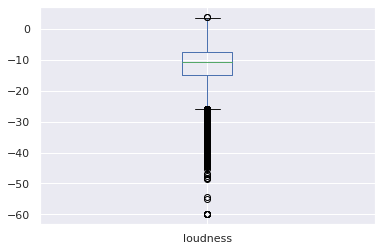

In [108]:
datos ['loudness'].plot(kind='box')                 # se observa una gran cantidad de valores atípicos
plt.show()

In [109]:
datos['loudness'].quantile(0.25)  # el primer cuartil nos indica que el 25% de las canciones presenta un valor menor o igual  a-14.9 en lodness

-14.908

In [110]:
datos['loudness'].quantile(0.5)  # el segundo cuartil indica que el 50% de las canciones presenta un valor de loudnes menor o igual a -10.83

-10.836

In [111]:
datos['loudness'].quantile(0.75)   # el tercer cuartil nos indica que el 75% de las canciones presenta un valor menor o igual a -7.49 en loudness

-7.499

Histograma de la Caracteristica **loudness**

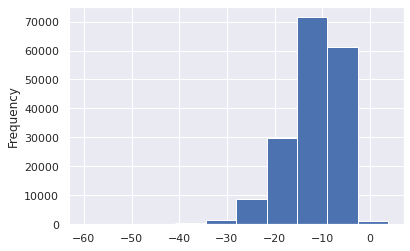

In [112]:
datos['loudness'].plot.hist();    # se aprecia una distribución con una inclinación negativa (hacia la derecha)

Medidas de tendencia central y otros valores de relevancia en el análisis

In [113]:
datos['loudness'].min()  # el valor más bajo en esta caracteristica es de -60

-60.0

In [114]:
datos['loudness'].max()  # el valor más alto es de 3.85

3.855

In [115]:
datos['loudness'].mode()  # el vlaor loudness más repetido es de -7.57

0   -7.578
dtype: float64

In [116]:
datos['loudness'].median()  # el valor de la mediana no indica que el 50% de las canciones presenta un valor menor o igual a -10.83

-10.836

In [117]:
datos['loudness'].mean()  # el valor promedio de la caracteristica de loudness es de -11.75

-11.750864991484395

In [118]:
datos['loudness'].std()  # la desviacion estandar de la loudness indica que los valores se alejan del promedio en 5.69

5.691590819194791

12.Analisis Exploratorio de la Caracteristica mode

**mode**: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico

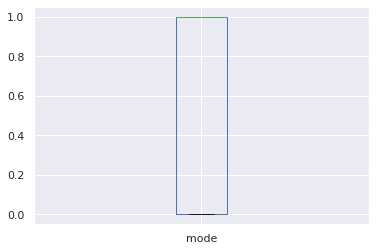

In [119]:
datos ['mode'].plot(kind='box')    # caracteristica binaria 
plt.show()

Histograma de la Caracteristica **mode**

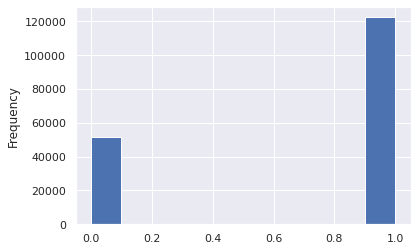

In [120]:
datos['mode'].plot.hist();   # corresponde a una variable binaria

Medidas de tendencia central y otros valores de relevancia en el análisis

In [121]:
datos['mode'].mode()   # el valor más repetido en la caracteristica es 1  (el valor mayor asignado a una canción)
                       # esta caracteristica se va excluir del dataset en el proceso de machine learning, porque no aplica para todas las canciones

0    1
dtype: int64

13.Analisis Exploratorio de la Caracteristica name

Al ser una caracteristica de tipo objeto o con datos en texto (diferentes idiomas) no se puede obtener cálculos o criterios numericos extensos.

In [122]:
datos['name'].mode            #según el resultado tenemos más de una sola canción con comportamiento de moda (siendo las canciones que más se presentan)

<bound method Series.mode of 0                                  Keep A Song In Your Soul
1                                      I Put A Spell On You
2                                              Golfing Papa
3         True House Music - Xavier Santos & Carlos Gomi...
4                                                 Xuniverxe
                                ...                        
174384                                              The One
174385                                        A Little More
174386                                             Together
174387                                   champagne problems
174388                                       Improvisations
Name: name, Length: 174389, dtype: object>

In [123]:
datos["name"].value_counts()

White Christmas                                103
Winter Wonderland                               88
Silent Night                                    81
Jingle Bells                                    71
2000 Years                                      70
                                              ... 
North American Scum                              1
I Was Only Joking                                1
Déjame Amarte                                    1
I'm Gonna Win                                    1
Kapitel 156 - Die drei Ehen der Grand Sophy      1
Name: name, Length: 137013, dtype: int64

In [124]:
datos.groupby('name').size()

name
"40"                              1
"40" - Live                       1
"40" - Remastered 2008            2
"45"                              1
"A" You're Adorable               1
                                 ..
소녀                                1
소년을 위로해줘 From Boys to Men 2013    1
쏘리 쏘리 Sorry, Sorry                1
애인만들기                             1
텅 빈 마음 Empty Heart                1
Length: 137013, dtype: int64

In [125]:
nombres_comunes = datos['name']

In [126]:
from collections import Counter

In [127]:
nombres_comunes.astype('string')

0                                  Keep A Song In Your Soul
1                                      I Put A Spell On You
2                                              Golfing Papa
3         True House Music - Xavier Santos & Carlos Gomi...
4                                                 Xuniverxe
                                ...                        
174384                                              The One
174385                                        A Little More
174386                                             Together
174387                                   champagne problems
174388                                       Improvisations
Name: name, Length: 174389, dtype: string

In [128]:
contador = Counter(nombres_comunes)
(contador.most_common(150))
contador_comunes=(contador.most_common(150))

In [129]:
contador_comunes  # se procede a buscar palabras comunes en los nombres de las canciones

[('White Christmas', 103),
 ('Winter Wonderland', 88),
 ('Silent Night', 81),
 ('Jingle Bells', 71),
 ('2000 Years', 70),
 ('Happy New Year', 57),
 ('Sleigh Ride', 54),
 ('Summertime', 53),
 ('The Christmas Song', 51),
 ('Silver Bells', 51),
 ('Overture', 49),
 ('O Holy Night', 48),
 ('99 Year Blues', 45),
 ("It's the Most Wonderful Time of the Year", 39),
 ('Ave Maria', 39),
 ('My Only Wish (This Year)', 38),
 ('Have Yourself a Merry Little Christmas', 36),
 ('7 Years', 36),
 ('Have Yourself A Merry Little Christmas', 34),
 ('Blue Christmas', 34),
 ('Hark! The Herald Angels Sing', 34),
 ('Stay', 34),
 ('Stardust', 33),
 ('New Years Day - Original Mix', 32),
 ('I Love You', 31),
 ('Santa Claus Is Coming To Town', 31),
 ('Autumn Leaves', 30),
 ('The First Noel', 29),
 ('The Little Drummer Boy', 28),
 ('Time After Time', 28),
 ('Goodbye', 27),
 ('Hold On', 27),
 ('Angel', 27),
 ('Home', 27),
 ('The Way You Look Tonight', 26),
 ('You', 26),
 ('Year 2000', 26),
 ('Finale', 25),
 ("Santa Cl

In [130]:
from wordcloud import WordCloud

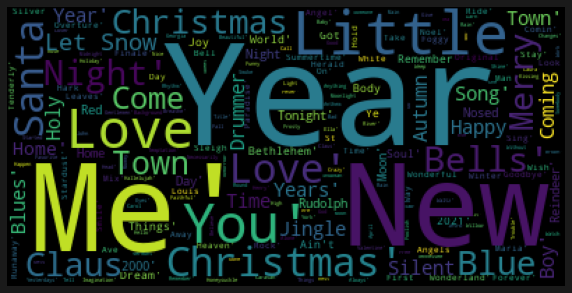

In [131]:
text2 = contador_comunes
wordcloud = WordCloud().generate(str(text2))
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

14.Analisis Exploratorio de la Caracteristica **popularity** 

**popularity**: La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular.

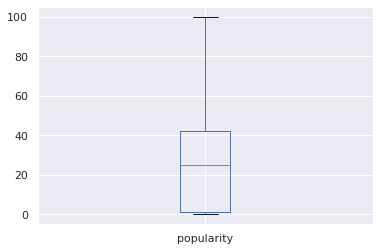

In [132]:
datos ['popularity'].plot(kind='box')                     # En la caracteristica de popularidad, el valor mínimo de cero 0, no presenta valores atípicos
plt.show()                                                # el valor de la mediana ronda 25

In [133]:
datos['popularity'].quantile(0.25)   # el primer cuartil indica que el 25% de las canciones se encuentran con un valor menor o igual a 1

1.0

In [134]:
datos['popularity'].quantile(0.5)   # el 50% de las canciones presenta un valor menor o igual a 25.

25.0

In [135]:
datos['popularity'].quantile(0.75)   # e valor del tercer cuartil indica que el 75% de las canciones presenta un valor menor o igual a 42

42.0

Histograma de la caracteristica 

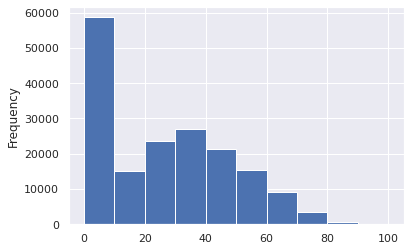

In [136]:
datos['popularity'].plot.hist();   # vemos una distribución con comportamiento positiva (hacia la izquierda)

Medidas de tendencia central y otros valores de relevancia en el análisis

In [137]:
datos['popularity'].min()   # el valor minimo corresponde a cero 0

0

In [138]:
datos['popularity'].max()   # el valor más alto es de 100

100

In [139]:
datos['popularity'].mode()   # que más se repite corresponde a cero 0

0    0
dtype: int64

In [140]:
datos['popularity'].median()  # el valor de la mediana nos indica que el 50% de las canciones presenta valor de popularity menor o igual a 25

25.0

In [141]:
datos['popularity'].mean()  #  el valor promedio de la caracteristica popularity es de 25.69

25.693380889849703

In [142]:
datos['popularity'].std() # la desviacion estanar nos indica que los valores se alejan del promedio en 21.87 en la catracteristica de popularity

21.87273982694497

15.Analisis Exploratorio de la Caracteristica release_date      

**release_date**: Fecha de publicación principalmente en formato aaaa-mm-dd

In [143]:
datos['release_date'].mode()    # el valor que más se repite corresponde a 1945

0    1945
dtype: object

In [144]:
datos['release_date']  #verificar una conversión, se va a trabajar con la caracteristica year, en lugar de release-date
                       # en vista que algunos de las fechas en concreto están incompletos, y para finalizades del estudio
                       # el año es suficiente.

0               1920
1         1920-01-05
2               1920
3         1920-01-01
4         1920-10-01
             ...    
174384    2020-12-25
174385    2021-01-22
174386    2020-12-09
174387    2021-01-07
174388    2020-12-09
Name: release_date, Length: 174389, dtype: object

16.Analisis Exploratorio de la Caracteristica speechiness

**speechiness**: detecta la presencia de palabras habladas en una pista.

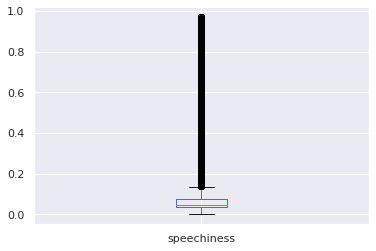

In [145]:
datos ['speechiness'].plot(kind='box')    # esta corresponde a una caracteristica con muchos outliers (deben tratarse en un proceso adelante)
plt.show()

In [146]:
datos['speechiness'].quantile(0.25)   # el valor del perimer cuartil nos indica que el 25% de las canciones presentan un valor menor o igual a 0.0352

0.0352

In [147]:
datos['speechiness'].quantile(0.5)   # el valor del segundo cuartil nos indica que el 50% de las canciones presentan un valor menor igual a 0.0455 en speechiness

0.0455

In [148]:
datos['speechiness'].quantile(0.75) # el tercer cuartil indica que el 50% estan con un valor menor igual a 0.0763 en speechiness

0.0763

Histograma de la Caracteristica **speechiness**

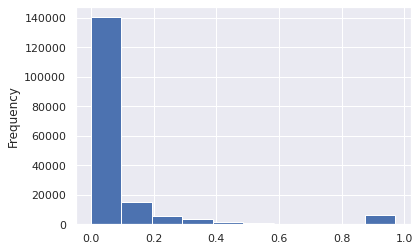

In [149]:
datos['speechiness'].plot.hist();   # la distribucion se observa con comportamiento positva (inclinacion hacia la izquierda)

Medidas de tendencia central y otros valores de relevancia en el análisis

In [150]:
datos['speechiness'].min() # el valor más bajo corresponde a cero 0

0.0

In [151]:
datos['speechiness'].max()    # el valor maás alto que se presenta en la caracteristica speechiness es de 0.971

0.971

In [152]:
datos['speechiness'].mode()  # el valor que más se repirte en la caracteristica speechiness es d e0.0337

0    0.0337
dtype: float64

In [153]:
datos['speechiness'].median()  # la mediana nos indica que el 50% de las canciones presenta un valor menor o igual a 0.0455 en speechiness

0.0455

In [154]:
datos['speechiness'].mean()  # el valor promedio de la caracteristica speechiness es de 0.1057

0.10572918360676538

In [155]:
datos['speechiness'].std()  # la desviacion estandar nos indica que los valores se alejan del promedio en 0.1822

0.1822601819249823

17.Analisis Exploratorio de la Caracteristica tempo 

**tempo**: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada

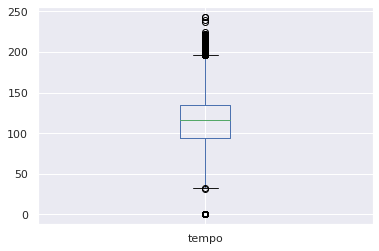

In [156]:
datos ['tempo'].plot(kind='box')    # esta caracteristica presenta outliers, el valor más bajo corresponde a 0, la mediana alrededor 115
plt.show()

In [157]:
datos['tempo'].quantile(0.25)  #primer quartil indica que un 25% de los valores de la caracteristica son menores o igual a 93.93

93.931

In [158]:
datos['tempo'].quantile(0.5) #  el 50% del los valores de la caracteristica son menor o igual 115.8

115.816

In [159]:
datos['tempo'].quantile(0.75)   # el tercer cuartil nos indica que el 75% de los datos son menor o igual a 135.01

135.011

Histograma de la Caracteristica **tempo**

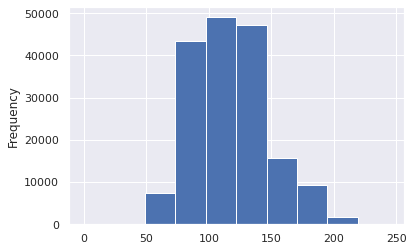

In [160]:
datos['tempo'].plot.hist();   # una distribución que se acerca a un comportamiento un poco simetrico

Medidas de tendencia central y otros valores de relevancia en el análisis

In [161]:
datos['tempo'].min()   # el valor más bajo corresponde a 0 cero

0.0

In [162]:
datos['tempo'].max()  # el valor más alto corresponde a  243.5

243.507

In [163]:
datos['tempo'].mode()  # el valor que más se repite es 0 cero

0    0.0
dtype: float64

In [164]:
datos['tempo'].median()  # el valor de la mediana nos indica que el 50% de los datos son menores o iguales a 115.81

115.816

In [165]:
datos['tempo'].mean()  # el valor promedio de la caracteristica tempo corresponde a 117.006

117.0064997964312

In [166]:
datos['tempo'].std()  # la desviacion estandar nos indica que los valores se alejan del promedio en 30.25

30.254178026289104

18.Analisis Exploratorio de la Caracteristica valence

**valence**: Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista.

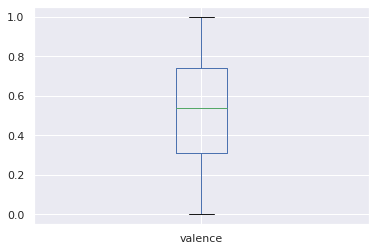

In [167]:
datos ['valence'].plot(kind='box')  # vemos esta caracteristica no presenta valores atipicos, el valor más bajo alrrededor de cero , la mediana rona 0.55
plt.show()

In [168]:
datos['valence'].quantile(0.25)   # el valor del primer cuartil nos indica que el 25% de los datos es menor o igual a 0.311

0.311

In [169]:
datos['valence'].quantile(0.5)   # el segundo cuartil indica que el 50% de los datos presenta un valor en valence menor o igual a 0.536

0.536

In [170]:
datos['valence'].quantile(0.75)  # el tercer cuartil indica que el 75% de los datos presenta un valor menor o igual  a 0.743

0.743

Histograma de la caracteristica 

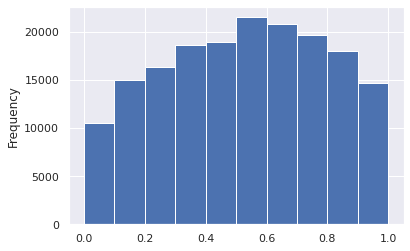

In [171]:
datos['valence'].plot.hist();   # se observa una distribucion que se asemeja a un tipo de distribucion simetrica con una inclinacion hacia la derecha.

Medidas de tendencia central y otros valores de relevancia en el análisis

In [172]:
datos['valence'].min() # el valor minimo corresponde a cero 0 

0.0

In [173]:
datos['valence'].max()  # el valor más alto corresponde a 1 

1.0

In [174]:
datos['valence'].mode()  # el valor que más se repite corresponde a 0.961

0    0.961
dtype: float64

In [175]:
datos['valence'].median()  # el valor de la mediana corresponde a 0.536 indica que el 50% de las canciones presenta un valor menor o igual a 0.536

0.536

In [176]:
datos['valence'].mean()  # el valor promeido de valence es de 0.5245

0.5245326904454883

In [177]:
datos['valence'].std()  # la desviacion estandar indica que las canciones se alejan del promedio en valance en 0.2644

0.264476797859951

19.Analisis Exploratorio de la Caracteristica year

**year**: Año de lanzamiento de la canción

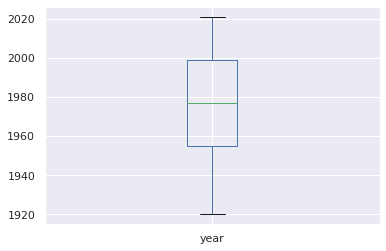

In [178]:
datos ['year'].plot(kind='box')     # en la caracteristica de año , no e observan valores atipicos
plt.show()

In [179]:
datos['year'].quantile(0.25)  # el primer cuartil indica que el 25% de las canciones tienn un año menor o igual a 1955

1955.0

In [180]:
datos['year'].quantile(0.5)  # el 50% de las canciones presentan un año menor o igual a 1977

1977.0

In [181]:
datos['year'].quantile(0.75)  # el tercer cuaritl indica que el 75% de las canciones presenta un año de lanzamiento meor o igual a  1999

1999.0

Histograma de la caracteristica  **Year**

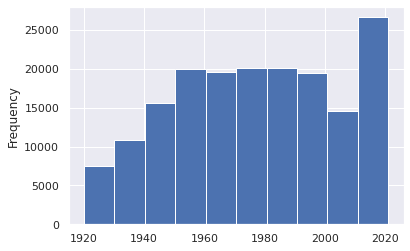

In [182]:
datos['year'].plot.hist();   # vemos una distribucion con comportamiento negativo (hacia la derecha)

Medidas de tendencia central y otros valores de relevancia en el análisis

In [183]:
datos['year'].min()  # el valor más bajo es el año 1920

1920

In [184]:
datos['year'].max()  # el valor más alto en el año de la cancion es 2021

2021

In [185]:
datos['year'].mode()  # el valor que más está presente es 2020

0    2020
dtype: int64

In [186]:
datos['year'].median()   # el valor de la mediana nos indica que el 50% de las canciones tienen un año menor o igual a 1977

1977.0

In [187]:
datos['year'].mean()   # el valor promedio del año en las canciones es de 1977

1977.0617642167797

In [188]:
datos['year'].std()   # el valor del año de las canciones se aleja del promedio en 26.9 segun la desviacion estandar

26.907950271118082

In [189]:
datos['year']

0         1920
1         1920
2         1920
3         1920
4         1920
          ... 
174384    2020
174385    2021
174386    2020
174387    2021
174388    2020
Name: year, Length: 174389, dtype: int64

##Tablas Pivote por Caracteristicas Seleccionadas

In [190]:
#Vamos a crear un rango por los años, sin embargo para que este rango no nos salga entre otros datos a futuro vamos a crear una copia 
# de datos, recordando que ya tenemos data, como el dataset original, datos como la primer copia, datos1 como la copia con los valores numéricos o de interes, en este coas
# vamos a probar una copia datos2

In [191]:
datos2 = datos.copy()

In [192]:
datos2.head(2)

acousticness               artists  danceability  ...    tempo  valence  year
0         0.991           Mamie Smith         0.598  ...  149.976    0.634  1920
1         0.643  Screamin Jay Hawkins         0.852  ...   86.889    0.950  1920

[2 rows x 19 columns]

In [193]:
datos2['year_range'] = (datos2['year']//5)*5 

In [194]:
datos2.head(4)

acousticness               artists  danceability  ...  valence  year  year_range
0      0.991000           Mamie Smith         0.598  ...   0.6340  1920        1920
1      0.643000  Screamin Jay Hawkins         0.852  ...   0.9500  1920        1920
2      0.993000           Mamie Smith         0.647  ...   0.6890  1920        1920
3      0.000173       Oscar Velazquez         0.730  ...   0.0422  1920        1920

[4 rows x 20 columns]

Pivote #1  Cantidad de Artistas según Contenido Explicito

In [195]:
datos2.pivot_table('artists', index= 'year_range', columns= 'explicit', aggfunc='count',fill_value=0)
                                            # el valor de cero es no explicito , la mayoria de los artistas están categorizados como no explicito

explicit        0     1
year_range             
1920          993    54
1925         3920   664
1930         4605   315
1935         5559   285
1940         5687   380
1945         8740   686
1950         9847   153
1955         9998     2
1960         9998     3
1965         9600     9
1970        10064    11
1975         9986    57
1980         9903   148
1985         9709   314
1990         9365   805
1995         8672  1486
2000         5569   959
2005         6463   791
2010         9234  1373
2015         9411  2437
2020         5184   950

Graficar la Tabla Pivote anterior

Pivote #1  Cantidad de Artistas según Contenido Explicito

<Figure size 1440x1440 with 0 Axes>

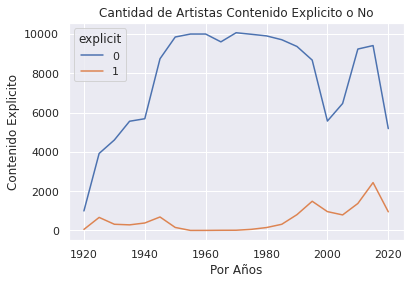

In [196]:
plt.figure(figsize = (20,20))
round(datos2.pivot_table('artists', index= 'year_range', columns= 'explicit', aggfunc='count',fill_value=0),2).plot()
plt.title("Cantidad de Artistas Contenido Explicito o No")
plt.ylabel("Contenido Explicito")
plt.xlabel("Por Años")
plt.show();

# se observa un crecimiento en la caracteristica de canciones o artistas con la categoria de explicito

Pivote #2 Cantidad de Canciones con Contenido o Calasificada como Explicito

In [197]:
datos2.pivot_table('name', index= 'year_range', columns= 'explicit', aggfunc='count',fill_value=0)

explicit        0     1
year_range             
1920          993    54
1925         3920   664
1930         4605   315
1935         5559   285
1940         5687   380
1945         8740   686
1950         9847   153
1955         9998     2
1960         9998     3
1965         9600     9
1970        10064    11
1975         9986    57
1980         9903   148
1985         9709   314
1990         9365   805
1995         8672  1486
2000         5569   959
2005         6463   791
2010         9234  1373
2015         9411  2437
2020         5184   950

Graficar la tabla pivote anterior

Pivote #2 Cantidad de Canciones con Contenido o Calasificada como Explicito

<Figure size 1440x1440 with 0 Axes>

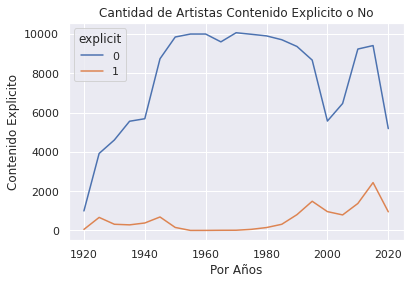

In [198]:
plt.figure(figsize = (20,20))
round(datos2.pivot_table('name', index= 'year_range', columns= 'explicit', aggfunc='count',fill_value=0),2).plot()
plt.title("Cantidad de Artistas Contenido Explicito o No")
plt.ylabel("Contenido Explicito")
plt.xlabel("Por Años")
plt.show();
# se observa un crecimiento en la caracteristica de canciones o artistas con la categoria de explicito

Pivote # 3 Canciones por Epocas

In [199]:
datos2.pivot_table('name', index= 'year_range', aggfunc='count',fill_value=0)

name
year_range       
1920         1047
1925         4584
1930         4920
1935         5844
1940         6067
1945         9426
1950        10000
1955        10000
1960        10001
1965         9609
1970        10075
1975        10043
1980        10051
1985        10023
1990        10170
1995        10158
2000         6528
2005         7254
2010        10607
2015        11848
2020         6134

graficar la tabla anterior

Pivote # 3 Canciones por Epocas

<Figure size 1440x1440 with 0 Axes>

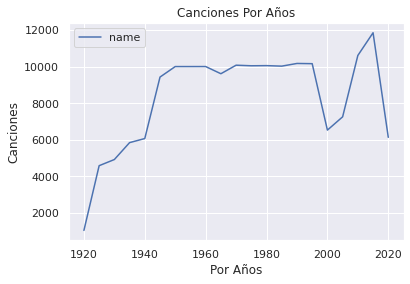

In [200]:
plt.figure(figsize = (20,20))
round(datos2.pivot_table('name', index= 'year_range', aggfunc='count',fill_value=0),2).plot()
plt.title("Canciones Por Años")
plt.ylabel("Canciones")
plt.xlabel("Por Años")
plt.show();

In [201]:
round(datos2.pivot_table('duration_ms', index= 'year_range', aggfunc='mean',fill_value=0))
# el valor promedio de la caracteristica de duracion de las canciones se ve con un incremento con el pasar de los años

duration_ms
year_range             
1920           208489.0
1925           180542.0
1930           186591.0
1935           207690.0
1940           210873.0
1945           222185.0
1950           218901.0
1955           219519.0
1960           209522.0
1965           211451.0
1970           251016.0
1975           255312.0
1980           249909.0
1985           251655.0
1990           247506.0
1995           247024.0
2000           240826.0
2005           235929.0
2010           270856.0
2015           242772.0
2020           220112.0

<Figure size 1440x1440 with 0 Axes>

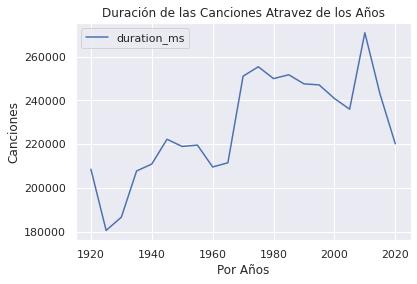

In [202]:
plt.figure(figsize = (20,20))
round((datos2.pivot_table('duration_ms', index= 'year_range', aggfunc='mean',fill_value=0)),2).plot()
plt.title("Duración de las Canciones Atravez de los Años")
plt.ylabel("Canciones")
plt.xlabel("Por Años")
plt.show();

Top 50 de Artistas o interpretes en el DATASET

Se procede a crear un Top de los artistas sin ningún criterio en específico, posteriormente se realizarán por criterios o caracteristicas

In [203]:
datos2.artists.value_counts() [:50]

Tadeusz Dolega Mostowicz              1281
Эрнест Хемингуэй                      1175
Эрих Мария Ремарк                     1062
Francisco Canaro                       951
Ignacio Corsini                        624
Frank Sinatra                          621
Elvis Presley                          494
Bob Dylan                              459
Johnny Cash                            456
Francisco Canaro, Charlo               456
Fleetwood Mac                          450
The Rolling Stones                     450
The Beach Boys                         434
Miles Davis                            427
The Beatles                            412
Billie Holiday                         397
Dean Martin                            392
Queen                                  391
Ella Fitzgerald                        389
Georgette Heyer, Irina Salkow          378
Lead Belly                             337
Led Zeppelin                           326
Lata Mangeshkar                        323
David Bowie

##Generación de algún tipo de TOPs por caracteristicas
esta segmentación por caracteristicas se realiza, para ver las diferentes opciones o resultados de las canciones según la caracteristica por las que se les agrupe

##Top 20 de las canciones más populares y sus Interpretes

In [204]:
artistas_canciones = datos2.iloc[:,[1,12,13,18]]        # la cancion más popular es drivers license de la interprete Olivia Rodrigo

In [205]:
popularidad = artistas_canciones.sort_values('popularity',ascending=False)

In [206]:
popularidad.head(20)

artists  ...  year
20062                Olivia Rodrigo  ...  2021
19862           24kGoldn, iann dior  ...  2020
19866                 Ariana Grande  ...  2020
19886        Bad Bunny, Jhay Cortez  ...  2020
19976                       KAROL G  ...  2020
19868                 Ariana Grande  ...  2020
19870                            CJ  ...  2020
19872                 The Kid LAROI  ...  2020
19876                 Billie Eilish  ...  2020
19928            Bad Bunny, ROSALÍA  ...  2020
19900                    Tate McRae  ...  2020
19878                     Pop Smoke  ...  2020
39252                        Tiësto  ...  2020
76406                          Boza  ...  2020
19884                     Lil Nas X  ...  2020
19880  Cardi B, Megan Thee Stallion  ...  2020
19908   Justin Bieber, benny blanco  ...  2020
20068                 Justin Bieber  ...  2021
19924   Shawn Mendes, Justin Bieber  ...  2020
19864                           SZA  ...  2020

[20 rows x 4 columns]

Se oberva que según el dataset de spotify las canciones más populares están fuertemente ligadas a ser recientes el top 20 se encuentra en el 2020 y 2021

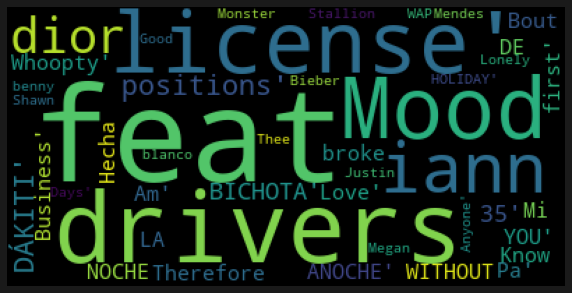

In [207]:
text4 = popularidad.name.head(20).values      #Al ser una caracteristica de tipo texto y no es conveniente convertirla a numérica
wordcloud = WordCloud().generate(str(text4))  # se procedió a generar un gráfico de nombres de las canciones top 20 en popularidad
plt.figure( figsize=(10,10), facecolor='k')   # los graficos de wordcloud se verán de forma distinta con cada ejecución
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Top 20 Canciones según Energy y sus Interpretes

In [208]:
artistas_canciones1 = datos2.iloc[:,[1,12,4,18]]   # la cancion con mayor top según la caracteristica energy es Oppressed Masses - 2018 Remaster	
                                                    # esta segmentación por caracteristicas se realiza, para ver las diferentes opciones
                                                    # o resultados de las canciones según la caracteristica por las que se les agrupe

In [209]:
energia = artistas_canciones1.sort_values('energy',ascending=False)

In [210]:
energia.head(20)

artists  ...  year
109879                           Carnage & Cluster  ...  2020
3543                                 Benny Goodman  ...  1938
126158                           Carnage & Cluster  ...  2020
56961                      Sneijder, Bryan Kearney  ...  2013
3563                                 Benny Goodman  ...  1938
56957             ReOrder, STANDERWICK, Sky Patrol  ...  2013
142449                             Rain Sounds ACE  ...  2017
39601                            Maurice Chevalier  ...  1926
56761                                      Komprex  ...  2012
91133                              3Phazegenerator  ...  2018
57241                     Simon OShine, Adam Navel  ...  2014
56927                                   Adam Ellis  ...  2013
105122                                  Darkthrone  ...  1994
158548  Craig Connelly, Siskin, Giuseppe Ottaviani  ...  2020
41853                                Benny Goodman  ...  1938
61338                                      K Dutta  ...  1944
112986                                 Unspecified  ...  1952
56805                       Running Man, SoundLift  ...  2012
143051                                   Creatress  ...  2020
57787      David Forbes, Emma Gillespie, Cold Blue  ...  2017

[20 rows x 4 columns]

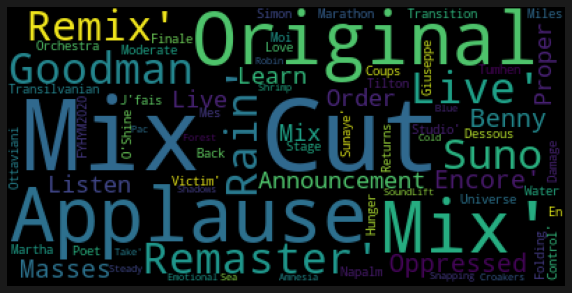

In [211]:
text5 = energia.name.head(20).values          #Al ser una caracteristica de tipo texto y no es conveniente convertirla a numérica
wordcloud = WordCloud().generate(str(text5))  # se procedió a generar un gráfico de nombres de las canciones top 20 en Energy
plt.figure( figsize=(10,10), facecolor='k')   # los graficos de wordcloud se verán de forma distinta con cada ejecución
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Cuando se procede a generar un filtrado del Top 20 de canciones por la caracteristica de Energy, se observa una aparición más mezclada por parte de canciones de varias épocas.

## Top 20 de Canciones según Danceability y sus Interpretes

In [212]:
artistas_canciones2 = datos2.iloc[:,[1,12,2,18]]

In [213]:
dance = artistas_canciones2.sort_values('danceability',ascending=False)

In [214]:
dance.head(20)

artists  ...  year
13734                                          Tone-Loc  ...  1989
54525   Spooner Street, Rio Dela Duna, Leonardo La Mark  ...  2021
141441                         Pitbull, Trina, Young Bo  ...  2012
37455                                          Tone-Loc  ...  2010
92739                                       Nilla Pizzi  ...  2014
171536                        Dan McKie, Zigmund Slezak  ...  2013
173266                                    Michael Beyer  ...  2016
154230                                        Daft Punk  ...  1997
13910                                       Vanilla Ice  ...  1990
39276                                          347aidan  ...  2020
51218                         The Jacksons, Mick Jagger  ...  1984
17628                                       Vanilla Ice  ...  2008
152648                                    Sir Mix-A-Lot  ...  1989
168126                                        Andrew E.  ...  1990
73439                                         DJ Casper  ...  2004
70671                                       Vanilla Ice  ...  1990
120198                                  Jungle Brothers  ...  1988
71335                                            Barney  ...  1994
89650                                  Dr. Jean Feldman  ...  1998
86153                                    Punkin Machine  ...  1981

[20 rows x 4 columns]

En este filtrado por la caracteristica de dancebility también permite una presencia más heterogenea de canciones de varias épocas.
Siendo una variable que si se les asigna a las canciones no se ve afectada por cuanto tiempo a pasado, como sí ocurre con popularidad actual.

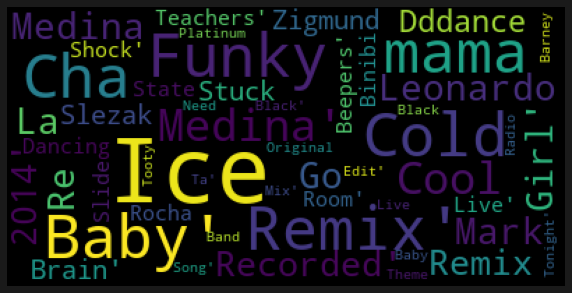

In [215]:
text6 = dance.name.head(20).values          #Al ser una caracteristica de tipo texto y no es conveniente convertirla a numérica
wordcloud = WordCloud().generate(str(text6))  # se procedió a generar un gráfico de nombres de las canciones top 20 en Danceability
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Top 20 Canciones Según Acousticness y sus Interpretes

In [216]:
artistas_canciones3 = datos2.iloc[:,[1,12,0,18]]

In [217]:
acoustic = artistas_canciones3.sort_values('acousticness',ascending=False)

In [218]:
acoustic.head(20)

artists  ...  year
40396                               Ignacio Corsini  ...  1930
23546                Frédéric Chopin, Claudio Arrau  ...  1941
78593                                   Ashok Kumar  ...  1941
78591                                     Khursheed  ...  1941
106466                 Jacques Ibert, Hae Won Chang  ...  2000
143879         Robert Schumann, Sergei Rachmaninoff  ...  1942
23609   Francisco Tárrega, Julio Martinez Oyanguren  ...  1941
143875         Robert Schumann, Sergei Rachmaninoff  ...  1942
1289                Bix Beiderbecke, The Wolverines  ...  1927
1288                Bix Beiderbecke, The Wolverines  ...  1927
78540          Johann Sebastian Bach, Claudio Arrau  ...  1941
78516                Frédéric Chopin, Claudio Arrau  ...  1941
78414                           Rabindranath Tagore  ...  1940
1265                                Bix Beiderbecke  ...  1927
23514                    Giorgos Papasideris, No. 6  ...  1940
143789                                   Elî Merdan  ...  1940
78458     Markos Vamvakaris, Apostolos Xatzixristos  ...  1940
143749                          Leyteris Melemenlis  ...  1940
23487                           Dinendranath Tagore  ...  1940
23475                                        Milios  ...  1940

[20 rows x 4 columns]

Cuando el filtrado se realiza por la caracteristica de Acoustic se denota una mayor aparición de canciones más antiguas, en las que predominaban los sonidos acústicos por su época.

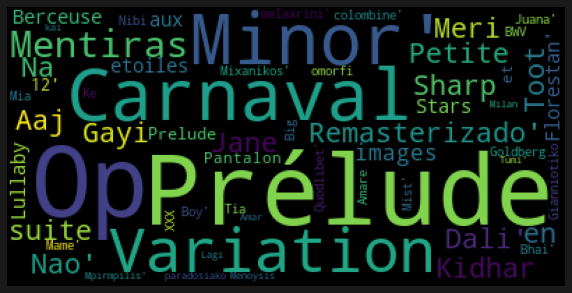

In [219]:
text7 = acoustic.name.head(20).values          #Al ser una caracteristica de tipo texto y no es conveniente convertirla a numérica
wordcloud = WordCloud().generate(str(text7))  # se procedió a generar un gráfico de nombres de las canciones top 20 en Acoustic
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Top 20 Canciones por Duracion y sus Interpretes

In [220]:
artistas_canciones4 = datos2.iloc[:,[1,12,3,18]]

In [221]:
duracion = artistas_canciones4.sort_values('duration_ms',ascending=False)
duracion.head(20)

artists  ...  year
92981                            B-Max  ...  2015
92953                  Various Artists  ...  2014
90109                           Orion.  ...  2021
93909                           Orion.  ...  2021
37393                        Dan McKie  ...  2013
74977                        Dan McKie  ...  2013
37521                      Mark Eteson  ...  2011
92593   Ori Uplift, Abora Sound Design  ...  2015
37135                          Dj Emma  ...  2009
37395                     Will Holland  ...  2011
141978                 Various Artists  ...  2015
93081                        Max Popov  ...  2016
37399                     Will Holland  ...  2011
92603                       Ori Uplift  ...  2015
109741                      Ori Uplift  ...  2019
55475                  Various Artists  ...  2006
55477                  Various Artists  ...  1996
93079                            B-Max  ...  2016
75133                            B-Max  ...  2013
92967                        Max Popov  ...  2015

[20 rows x 4 columns]

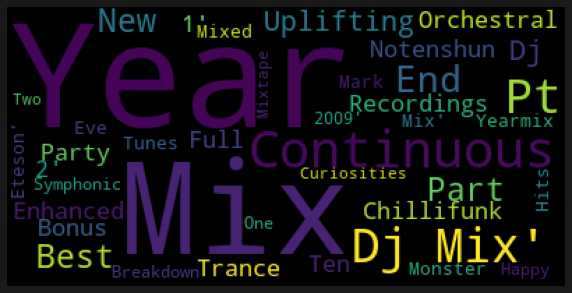

In [222]:
text8 = duracion.name.head(20).values          #Al ser una caracteristica de tipo texto y no es conveniente convertirla a numérica
wordcloud = WordCloud().generate(str(text8))  # se procedió a generar un gráfico de nombres de las canciones top 20 en Duracion ms
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Top 20 Canciones por Instrumentalness y sus Interpretes

In [223]:
artistas_canciones5 = datos2.iloc[:,[1,12,7,18]]

In [224]:
instrumentos = artistas_canciones5.sort_values('instrumentalness',ascending=False)
instrumentos.head(20)

artists  ...  year
19302   Erik Eriksson, White Noise Baby Sleep, White N...  ...  2017
93318   Erik Eriksson, White Noise for Babies, White N...  ...  2017
142261                                         Zen Sounds  ...  2016
157709         The White Noise Zen & Meditation Sound Lab  ...  2016
38892                               High Altitude Samples  ...  2018
125791  Erik Eriksson, Lullabies for Deep Meditation, ...  ...  2016
76018                               High Altitude Samples  ...  2018
157429  Sleep Baby Sleep, Meditation Spa, White Noise ...  ...  2014
157599  Calming Rainforest Sounds, Rainfall, Rain Soun...  ...  2015
92672   Sleep Baby Sleep, Meditation Spa, White Noise ...  ...  2014
70239                                            Nataural  ...  1988
136567                                           Nataural  ...  1988
61338                                             K Dutta  ...  1944
104991                                      John Williams  ...  1993
173509                                   Dreams of Dreams  ...  2017
173764                               First State, Shinovi  ...  2018
142525                                  The Sleep Helpers  ...  2017
22628                                        Apocolothoth  ...  1936
158101                                 Lush Rain Creators  ...  2017
125979                                  Rain Sound Studio  ...  2017

[20 rows x 4 columns]

##Top 20 canciones por Tempo y sus Interpretes

In [225]:
artistas_canciones6 = datos2.iloc[:,[1,12,16,18]]

In [226]:
tiempo = artistas_canciones6.sort_values('tempo',ascending=False)
tiempo.head(20)

artists                                   name    tempo  year
84474       Bill Withers            I Don't Want You on My Mind  243.507  1972
29835          J.J. Cale                        Call The Doctor  243.372  1972
65985          Bob Dylan                          Dear Landlord  238.895  1967
29374      Grateful Dead               Candyman - 2013 Remaster  236.799  1970
167770           Suicide    Surrender - 2005 Remastered Version  224.437  1988
121924        Portishead                               Undenied  222.605  1997
156668  Aviation Weather                    Sail over the Storm  221.954  2020
2753         Bimal Gupta                             Biyer Pare  221.741  1934
136469         Big Black                                 L Dopa  221.112  1987
3947      Anestis Delias                    To xaremi sto xamam  221.058  1940
127154    Anestis Delias                    To xaremi sto xamam  221.058  1930
21617        M. N. Ghosh               Din Phuralo Samjhe Chalo  220.229  1931
94140   Francisco Canaro  Yo Necesito Ser Feliz - Remasterizado  220.192  1926
19636          YNW Melly                               Mama Cry  220.099  2018
20716   Francisco Canaro   Chismes de la Rivera - Remasterizado  220.076  1926
91527          MC Shakie                    Vockahmercial Break  219.971  2018
91537          MC Shakie                 Katey Vs Katey Round 2  219.860  2018
93567      Valentin Guay                              Year 2019  219.833  2018
58556   Francisco Canaro                 Sussie - Remasterizado  219.461  1926
124915       Beach House                                 Lazuli  219.446  2012

In [227]:
datos2['decade_range'] = (datos2['year']//10)*10

In [228]:
datos2.pivot_table('popularity', ['decade_range'], aggfunc='max',)

popularity
decade_range            
1920                  51
1930                  63
1940                  80
1950                  85
1960                  87
1970                  86
1980                  84
1990                  90
2000                  85
2010                  91
2020                 100

## Comportamiento en Tiempo de las Caracteristicas

In [229]:
year_avrg = datos2[['popularity','energy','tempo','instrumentalness','danceability','acousticness','year']].\
groupby("year").mean().sort_values(by="year").reset_index()

In [230]:
year_avrg.head(5)

year  popularity    energy  ...  instrumentalness  danceability  acousticness
0  1920    0.610315  0.418700  ...          0.354219      0.515750      0.631242
1  1921    0.391026  0.241136  ...          0.337158      0.432171      0.862105
2  1922    0.090909  0.226173  ...          0.254776      0.575620      0.828934
3  1923    5.205405  0.262406  ...          0.371733      0.577341      0.957247
4  1924    0.661017  0.344347  ...          0.581701      0.549894      0.940200

[5 rows x 7 columns]

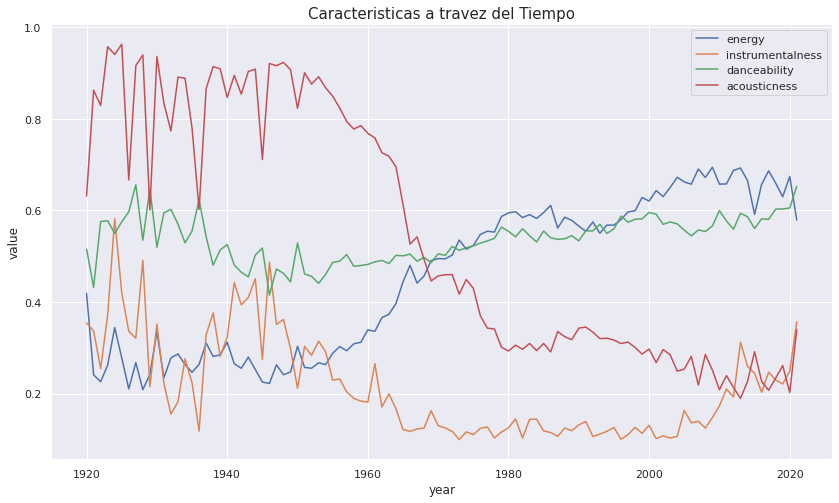

In [231]:
plt.figure(figsize=(14,8))
plt.title("Caracteristicas a travez del Tiempo", fontdict={"fontsize": 15})

lines = ['energy','instrumentalness','danceability','acousticness']

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avrg)
plt.ylabel("value")
plt.legend(lines)

# Según se aprecia en este gráfico los valores de Acousticness decaen con el pasar del tiempo, mientras que energy en su lugar se va
#incrementano con el pasar de los años , Danceability presenta fluctuaciones pero se recupera con el tiempo.

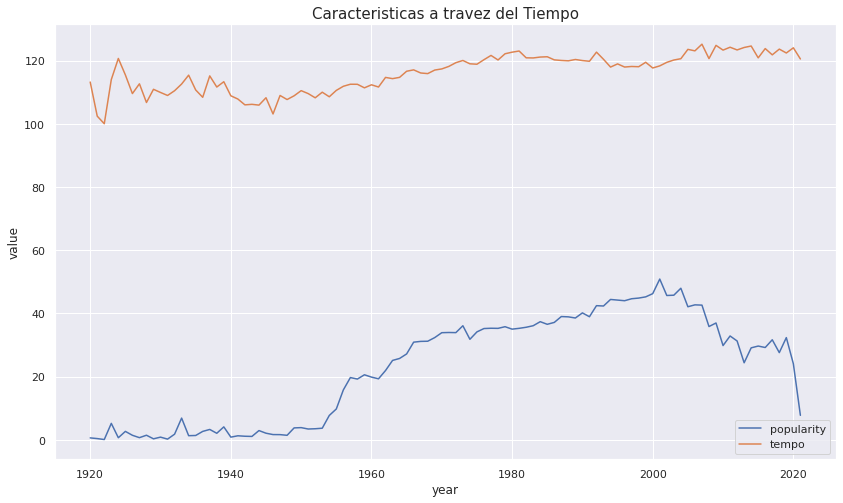

In [232]:
plt.figure(figsize=(14,8))   
plt.title("Caracteristicas a travez del Tiempo", fontdict={"fontsize": 15})

lines = ['popularity','tempo']

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avrg)
plt.ylabel("value")
plt.legend(lines)                                      # Según se aprecia en este gráfico los valores en duración promedio de las canciones 
                                                       # para mantenerse con el pasar de los años, sin embargo el valor de la popularidad 
                                                       # sí se ve afectado por el paso del tiempo, las canciones más recientes presentan mayor popularidad

In [233]:
datos1.groupby(['year']).mean() 

acousticness  danceability  ...       tempo   valence
year                              ...                      
1920      0.631242      0.515750  ...  113.226900  0.498210
1921      0.862105      0.432171  ...  102.425397  0.378276
1922      0.828934      0.575620  ...  100.033149  0.571190
1923      0.957247      0.577341  ...  114.010730  0.625492
1924      0.940200      0.549894  ...  120.689572  0.663725
...            ...           ...  ...         ...       ...
2017      0.207413      0.580475  ...  121.829807  0.436313
2018      0.233836      0.602731  ...  123.644288  0.426566
2019      0.261344      0.603101  ...  122.419702  0.457813
2020      0.202303      0.605285  ...  124.058308  0.468030
2021      0.340253      0.652488  ...  120.525875  0.451908

[102 rows x 12 columns]

##Grafico de **Scattermatrix**

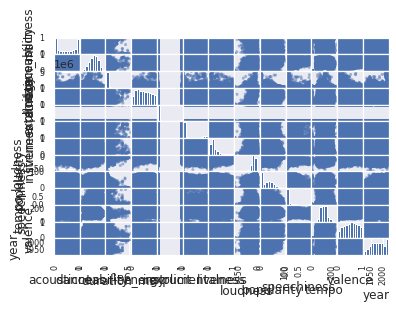

In [234]:
from pandas.plotting import scatter_matrix # diagramas de correlacción
scatter_matrix(datos1)
plt.show()

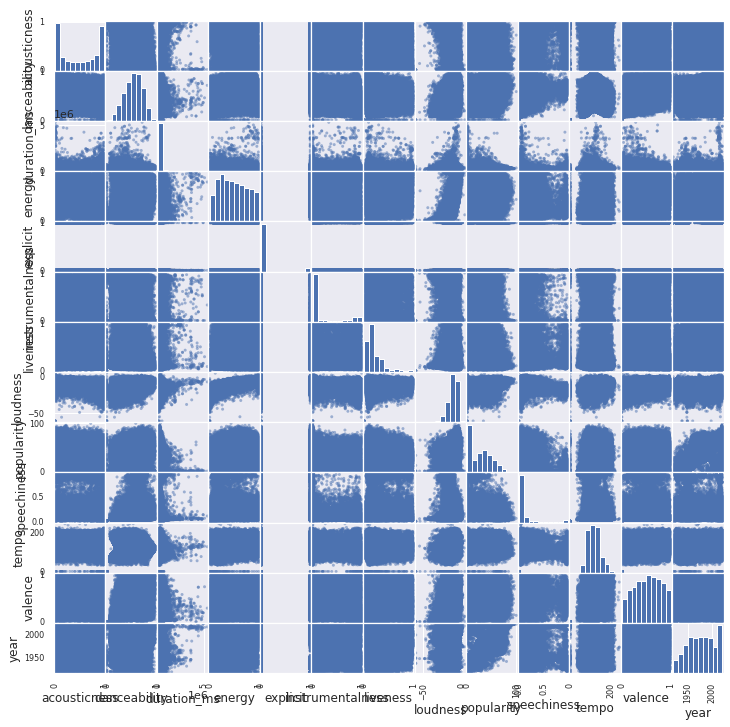

In [235]:
scatter_matrix(datos1, figsize = (12, 12));

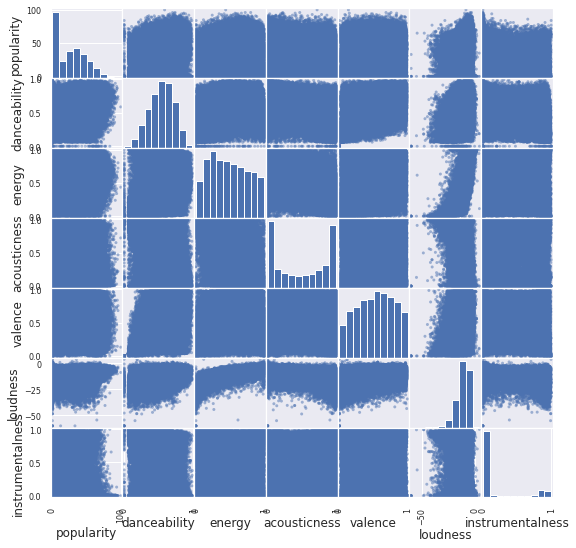

In [236]:
scatter_matrix((datos1[['popularity',"danceability","energy",'acousticness','valence','loudness','instrumentalness']]),figsize = (9, 9));

Realizar una verificación de la Variable de Duracion de la Cancion y su relacion con Danceability

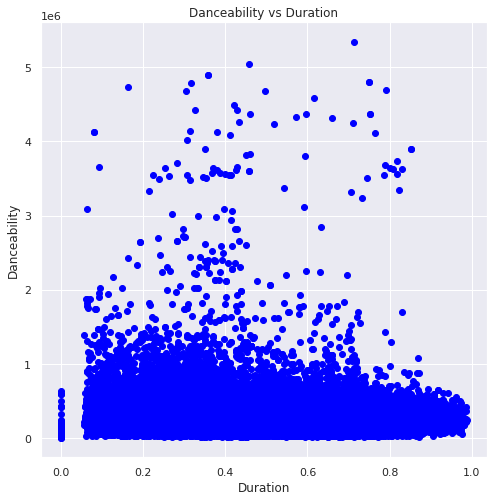

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))                   # no queda clara una correlación entre estas dos caracteristicas
plt.scatter(datos2.danceability, datos2.duration_ms, color = 'blue')       # se observa dispersión en los puntos
plt.title('Danceability vs Duration')
plt.ylabel('Danceability')
plt.xlabel('Duration')
plt.show()

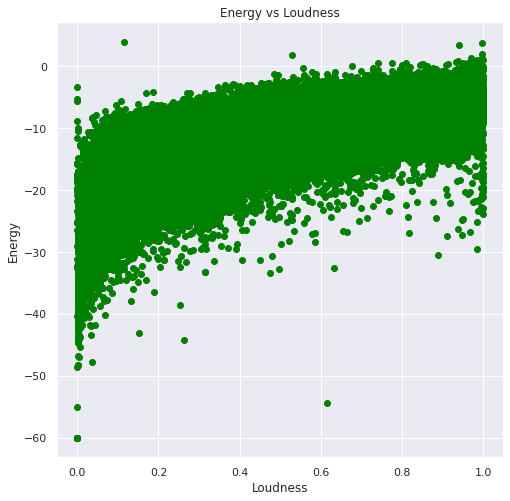

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))           # Se puede apreciar por medio de este gráfico una correlación entre Energy y Loudness
plt.scatter(datos2.energy, datos2.loudness, color = 'green')       # en lo que si incrementa una caracteristica también incrementará la otra.
plt.title('Energy vs Loudness')
plt.ylabel('Energy')
plt.xlabel('Loudness')
plt.show()

##Gráfica de Correlación


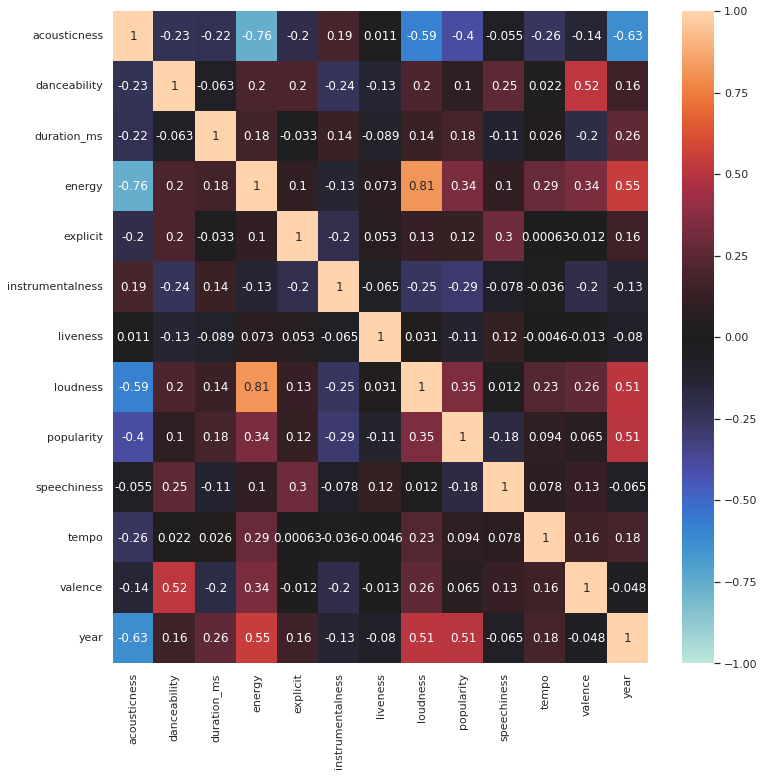

In [239]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(datos1.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Existe una relación negativa fuerte entre **acousticness** y **energy** para un valor de -0.76 lo que indica que si aumenta una disminuye la otra

Existe una relación negativa fuerte entre **acousticness** y **Loudness** para un valor de -0.59 lo que indica que si aumenta una disminuye la otra

Existe una relación negativa fuerte entre **acousticness** y **year** para un valor de -0.63 lo que indica que si aumenta una disminuye la otra

La caracteristica **Danceability** presenta un correlacion positiva media con **valence** lo que indica que al aumentar una también aumenta la otra

La caracteristica duration_ms casi no presenta correlaciones representativas con las demás caractaristicas, la única que presenta un valor superior en relación sería con **acousticnees** presentando un valor de -0.22 siendo una correlación negativa

La caracteristica **Energy** presenta correlación positva fuerte con las caracteristicas **Loudness** un valor de 0.81  y con **year** 0.55, lo que indica que conform aumenta una la otra tambien aumenta
Mientras que presenta **Energy** una relación negativa con la caracteristica **acousticness** con un valor de -0.76 lo que indica que si incrementa una disminuye la otra.

La caracteristica **explicit** presenta una leve relación con la caracteristica **speechiness** con un valor de 0.3, si incrementa una puede presentar un incremento en la otra
La caracteristica presenta **explicit** una relación negativa leve con las caracteristicas **acousticness** y **instrumentalness** con un valor de -0.2 con ambas caracteristicas.

la caracteristica **liveness** presenta poca o casi nula en las correlaciones con las demás caracteristicas. con la que presenta el valor mayor sería con **danceability** con un valor negativo de -0.13 

La caracteristica **loudness** presenta una correlación positiva alta con la caracteristica **energy** con un valor de 0.81  si aumenta una la otra tambien aumenta

**popularity** presenta una correlación positiva alta con la caracteristica **year** por lo que si aumenta una la otra también aumentará. Además la carcteristica **popularity** presenta una correlación negativa con la caractistica **acousticness** con un valor de -0.4 si aumenta una la otra va a disminuir.

En lo que respecta a **speechiness** con la que presenta una correlación baja sería **danceability** con un valor de 0.25 , lo que indica que un incremento en una puede presentar un incremento en la otra caracteristica.  **Tempo** solo presenta un correlación media con la caracteristica **energy** con un valor de 0.29 en lo que incrementa una presenta un incremento en la otra.

##ANOVA

Según la recomendación del team leader, no se debe calcular el ANOVA en este dataset, esto debido al tipo de de los datos, presentan muchos decimales o valores muy grandres que no permiten una apreciación correcta para el ANOVA

##Modelo de Machine Learning

In [240]:
datos1

acousticness  danceability  duration_ms  ...    tempo  valence  year
0           0.991000         0.598       168333  ...  149.976   0.6340  1920
1           0.643000         0.852       150200  ...   86.889   0.9500  1920
2           0.993000         0.647       163827  ...   97.600   0.6890  1920
3           0.000173         0.730       422087  ...  127.997   0.0422  1920
4           0.295000         0.704       165224  ...  122.076   0.2990  1920
...              ...           ...          ...  ...      ...      ...   ...
174384      0.009170         0.792       147615  ...  125.972   0.1860  2020
174385      0.795000         0.429       144720  ...   94.710   0.2280  2021
174386      0.806000         0.671       218147  ...  108.058   0.7140  2020
174387      0.920000         0.462       244000  ...  171.319   0.3200  2021
174388      0.239000         0.677       197710  ...  112.208   0.7470  2020

[174389 rows x 13 columns]

In [241]:
X = datos1  # Renombrando variable para utilizarla en Scikit-Learn

In [242]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Componentes Principales como Optimizador de la cantidad de Variables Optimas

In [243]:
# Importando PCA
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [244]:
evr = pca.explained_variance_ratio_
evr

array([0.27784755, 0.13833818, 0.10201131, 0.08905998, 0.07564155,
       0.07117316, 0.06344042, 0.04854184, 0.04534896, 0.03380018,
       0.02501394, 0.02053265, 0.00925028])

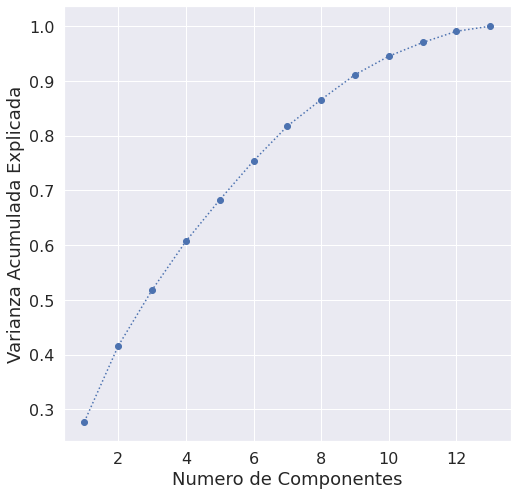

In [245]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [246]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 7


###Algoritmo K-means

In [247]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


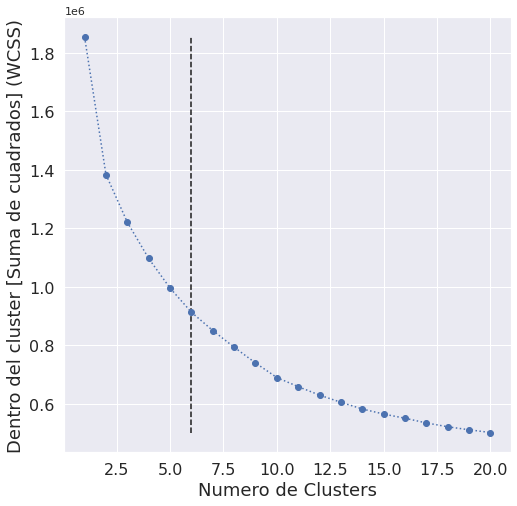

In [248]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Analisis y Visualización

In [249]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [250]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

acousticness  danceability  duration_ms  ...  Component 6  Component 7  Cluster
0      0.991000         0.598       168333  ...    -0.446351     1.014065        5
1      0.643000         0.852       150200  ...     1.329545     0.003091        5
2      0.993000         0.647       163827  ...     1.201782     0.327335        5
3      0.000173         0.730       422087  ...     0.079493    -0.128034        2
4      0.295000         0.704       165224  ...    -0.307095    -0.563784        1

[5 rows x 21 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



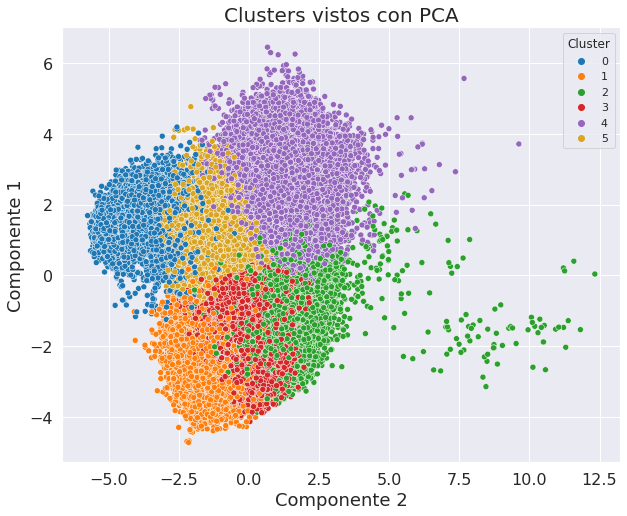

In [251]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

# Se puede ver que hay mancha a nivel de los componentes, esto se puede mejorar tratando los atipicos

#observamos un cluster 4 (violeta) un poco definido con datos o valores dispersos (puntos) 
# ademas vemos el cluster 0 (azul) que se encuentra muy compacto y el cluster 1 (naranja) sobrepuesto o en medio del resto de los clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



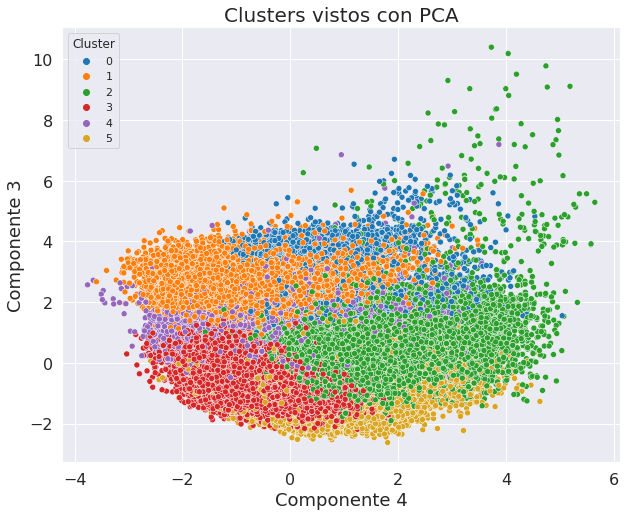

In [253]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 4']
y = df_seg_pca_kmeans['Component 3']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 4", fontsize=18)
plt.ylabel("Componente 3", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

# En este caso se cambian los componentes y se puede ver una gran dispersión en los clusters.

In [252]:
# Marcando cada uno de los datos con su respectivo cluster en el dataset original

data['Cluster'] = df_seg_pca_kmeans['Cluster']
data

acousticness                             artists  ...  year  Cluster
0           0.991000                     ['Mamie Smith']  ...  1920        5
1           0.643000           ["Screamin' Jay Hawkins"]  ...  1920        5
2           0.993000                     ['Mamie Smith']  ...  1920        5
3           0.000173                 ['Oscar Velazquez']  ...  1920        2
4           0.295000                            ['Mixe']  ...  1920        1
...              ...                                 ...  ...   ...      ...
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']  ...  2020        3
174385      0.795000                    ['Alessia Cara']  ...  2021        4
174386      0.806000                       ['Roger Fly']  ...  2020        5
174387      0.920000                    ['Taylor Swift']  ...  2021        1
174388      0.239000                       ['Roger Fly']  ...  2020        2

[174389 rows x 20 columns]

In [254]:
# Comprobando cantidad de datos en cada Cluster

pd.value_counts(data['Cluster'])

3    56086
5    39703
4    34932
2    27633
1     9109
0     6926
Name: Cluster, dtype: int64

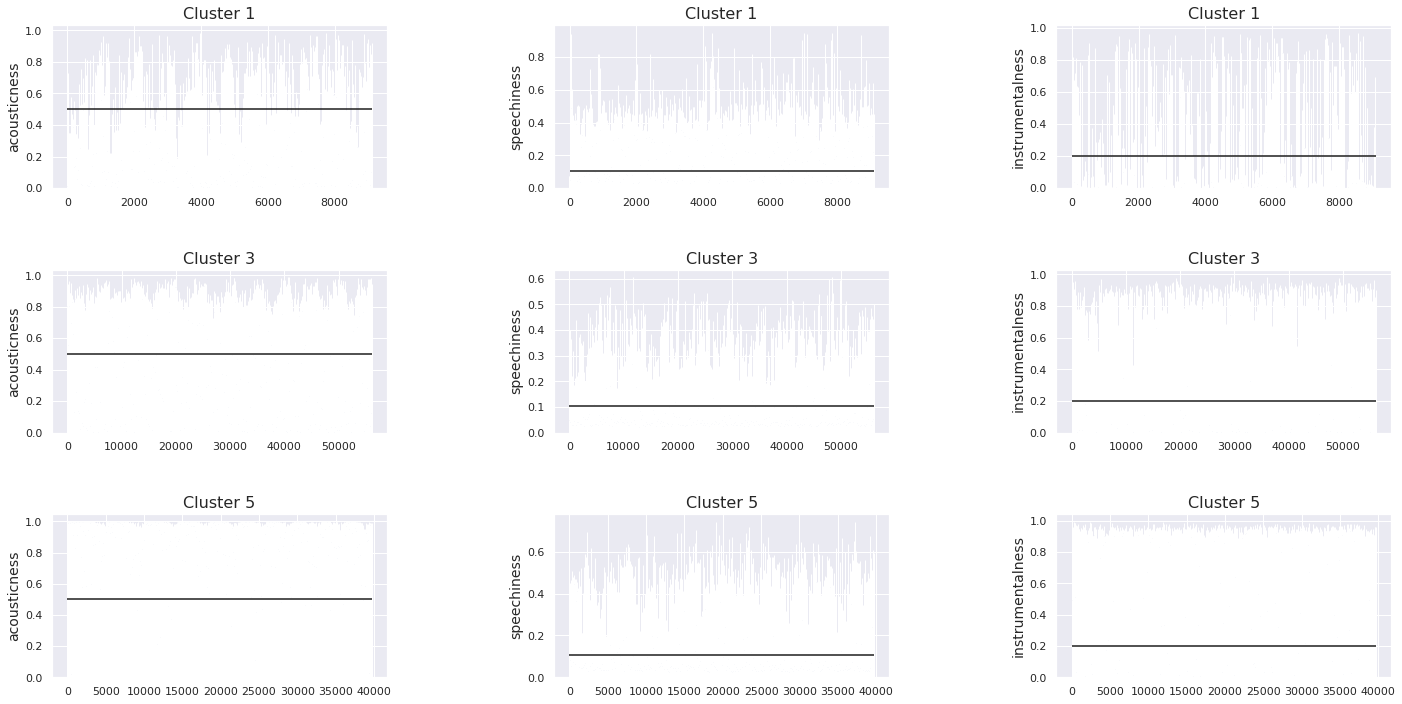

In [255]:
# Visualizando caracteristicas generales de cada cluster

clusters = [1, 3, 5]
features = ["acousticness", "speechiness", "instrumentalness"]
#colors = ['tab:green', 'tab:olive', 'tab:cyan']
dim = len(clusters)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = data.loc[data['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = data.loc[data['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y) #colors[i//dim]
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(data[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1

    # vemos en el cluster 1 caracteristica instrumentalness muy picudas las lineas
    # ademas vemos un poco más estable los datos en el cluster 5 en las caracteristicas acusticness e instrumentalness
    #speechiness vemos que en los tres clusters tiene mucho salto entre sus líneas

    #Cluster 5 presenta los valores mas altos entre todos en las caracteristicas de acoustiness e instrumentalness

In [297]:
preview = data.loc[data['Cluster'] == 5]     #realizar una visualización del dataset con información resumida por el cluster
print(len(preview))
preview.head(n=30)

39703


acousticness                              artists  ...  year  Cluster
0        0.99100                      ['Mamie Smith']  ...  1920        5
1        0.64300            ["Screamin' Jay Hawkins"]  ...  1920        5
2        0.99300                      ['Mamie Smith']  ...  1920        5
6        0.99200                      ['Mamie Smith']  ...  1920        5
7        0.99600    ['Mamie Smith & Her Jazz Hounds']  ...  1920        5
8        0.99600                 ['Francisco Canaro']  ...  1920        5
11       0.99600                 ['Francisco Canaro']  ...  1920        5
14       0.99300                   ['Takis Nikolaou']  ...  1920        5
15       0.97900              ['Aggeliki Karagianni']  ...  1920        5
16       0.97200                 ['Giorgos Katsaros']  ...  1920        5
17       0.99600                 ['Francisco Canaro']  ...  1920        5
18       0.75000                 ['Giorgos Katsaros']  ...  1920        5
19       0.99300                      ['Amalia Vaka']  ...  1920        5
20       0.02390                ['Ron van der Kraan']  ...  1920        5
21       0.93900  ["Vasílis Besíris 'Tourkovasílis'"]  ...  1920        5
23       0.01050                ['Ron van der Kraan']  ...  1920        5
25       0.25000                           ['Jodoli']  ...  1920        5
26       0.95900        ['Athanasía Alexandropoúlou']  ...  1920        5
29       0.98400              ['Manolis Karapiperis']  ...  1920        5
30       0.94400                      ['Félix Mayol']  ...  1920        5
32       0.99600                ['Maurice Chevalier']  ...  1920        5
33       0.03970                   ['David Daniells']  ...  1920        5
35       0.00397                ['Ron van der Kraan']  ...  1920        5
36       0.79000           ["The Swingin' Bachelors"]  ...  1920        5
37       0.00744                ['Ron van der Kraan']  ...  1920        5
39       0.31000                             ['biex']  ...  1920        5
40       0.99500   ['Mamie Smith', 'The Harlem Trio']  ...  1920        5
41       0.98600                    ['Esther Lekain']  ...  1920        5
42       0.99500    ['Mamie Smith & Her Jazz Hounds']  ...  1920        5
46       0.14700           ["The Swingin' Bachelors"]  ...  1920        5

[30 rows x 20 columns]

## Prueba Limpiando los Outliers

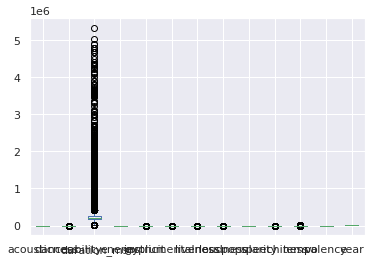

In [256]:
datos1.plot(kind='box')    # vamos a limpiar los atipicos sin afectar materialmente (no quitar de más) el contenido de los datos en este dataset
plt.show()

In [257]:
datos3 = datos1.copy()

In [258]:
datos3.head(2)

acousticness  danceability  duration_ms  ...    tempo  valence  year
0         0.991         0.598       168333  ...  149.976    0.634  1920
1         0.643         0.852       150200  ...   86.889    0.950  1920

[2 rows x 13 columns]

In [259]:
quantiles = np.percentile(data['speechiness'], [25,50,75])
quantiles

array([0.0352, 0.0455, 0.0763])

In [260]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles[1]
IQR = quantiles[2]-quantiles[0]
sigma = 0.75*IQR

In [267]:
datos3 = datos3.query("(speechiness > @median - 3*@sigma) & (speechiness < @median + 3*@sigma)")

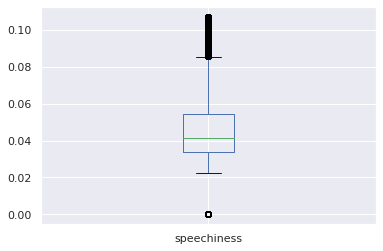

In [268]:
datos3 ['speechiness'].plot(kind='box')
plt.show()

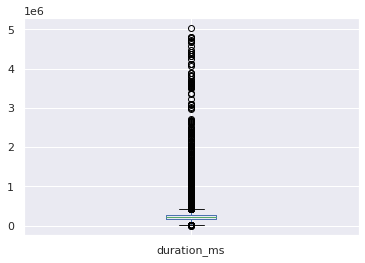

In [269]:
datos3 ['duration_ms'].plot(kind='box')              # Se observa una gran cantidad de valores atípicos
plt.show()

In [270]:
quantiles1 = np.percentile(data['duration_ms'], [25,50,75])
quantiles1

array([166133., 205787., 265720.])

In [271]:
# Analizando desde el punto de dispersion de los datos 
median = quantiles1[1]
IQR = quantiles1[2]-quantiles1[0]
sigma = 0.75*IQR

In [272]:
datos3 = datos3.query("(duration_ms > @median - 3*@sigma) & (duration_ms < @median + 3*@sigma)")

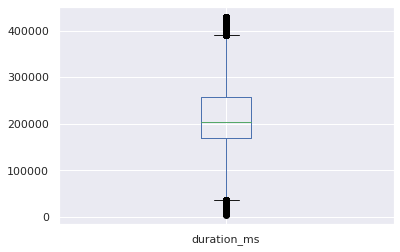

In [273]:
datos3 ['duration_ms'].plot(kind='box')          # se observan atipicos pero de forma reducida en comparacion al grupo anterior
plt.show()

In [274]:
datos3

acousticness  danceability  duration_ms  ...    tempo  valence  year
0           0.991000         0.598       168333  ...  149.976   0.6340  1920
1           0.643000         0.852       150200  ...   86.889   0.9500  1920
3           0.000173         0.730       422087  ...  127.997   0.0422  1920
4           0.295000         0.704       165224  ...  122.076   0.2990  1920
5           0.996000         0.424       198627  ...  103.870   0.4770  1920
...              ...           ...          ...  ...      ...      ...   ...
174384      0.009170         0.792       147615  ...  125.972   0.1860  2020
174385      0.795000         0.429       144720  ...   94.710   0.2280  2021
174386      0.806000         0.671       218147  ...  108.058   0.7140  2020
174387      0.920000         0.462       244000  ...  171.319   0.3200  2021
174388      0.239000         0.677       197710  ...  112.208   0.7470  2020

[135850 rows x 13 columns]

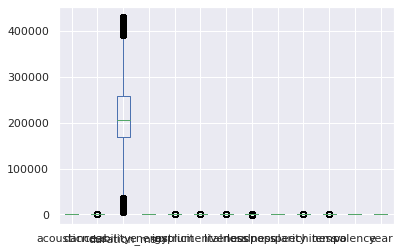

In [275]:
datos3.plot(kind='box')    # vamos a realizar una prueba del modelo de machine learning con los datos a este nivel, para no eliminar datos más de lo debido
plt.show()                  # pasando del dataset original de 174 mil a uno de 141 mil

## Correr modelo No Supervisado con Eliminación de Atípicos

In [276]:
X = datos3

In [277]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [278]:
# Importando PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [279]:
# El atributo muestra cuanta varianza es explicada por cada uno de las 13 variables
evr = pca.explained_variance_ratio_
evr

array([0.2865349 , 0.12211878, 0.09659811, 0.08306634, 0.07808017,
       0.0716022 , 0.06305097, 0.05405935, 0.05123874, 0.03655916,
       0.02746646, 0.02097114, 0.00865369])

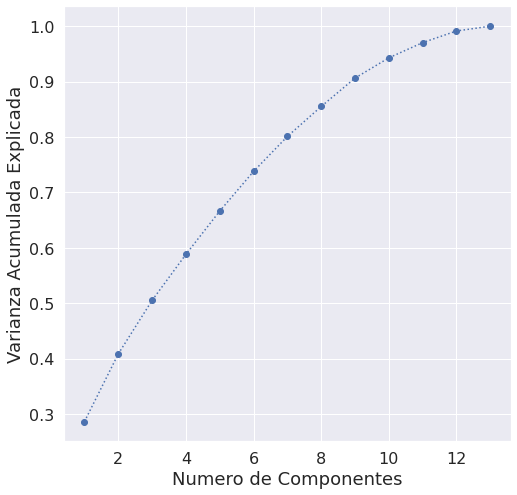

In [280]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [281]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 7


Realizamos nuevamente el algoritmo de K-MEANS

In [282]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


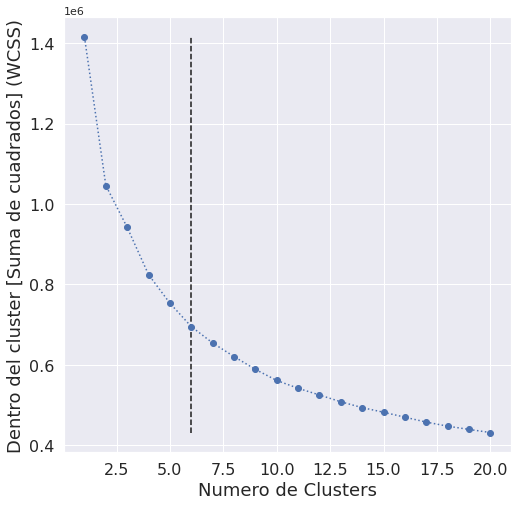

In [283]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [284]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [285]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

acousticness  danceability  duration_ms  ...  Component 6  Component 7  Cluster
0      0.991000         0.598       168333  ...     0.535213    -2.123560        3
1      0.643000         0.852       150200  ...    -1.044315    -0.123527        3
2      0.000173         0.730       422087  ...    -1.514614    -0.760214        2
3      0.295000         0.704       165224  ...    -0.016774    -0.793805        5
4      0.996000         0.424       198627  ...    -0.379523     0.489333        1

[5 rows x 21 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



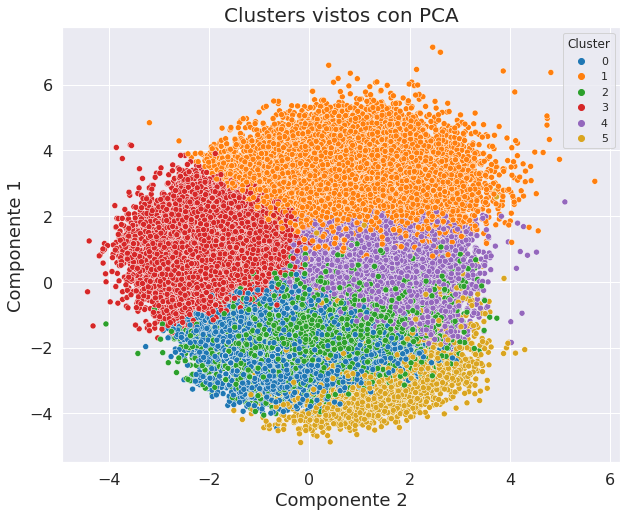

In [286]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

# vemos un mejor comportamiento de los clusters una vez que se le aplicó un proceso de eliminacion de los atipicos a nivl básico.
# se puede ver el cluster 3 (rojo) que se encuentra en componente 2 desde -4 a la cercanía de 0 , y en componente 1 se encuentra entre 3.8 a -1.8
# el otro Cluster que se observa definido corresponde a 1 (naranja)  un grupo en componente 2 desde -2 a llegar alrededor de 3.8
# y en el componente 1 , se oberva que abarca desde 1 a llegar a cercanias de 5.
# se observan unos cuantos valores individuales (puntos dispersos)

Resumen de Datos

In [288]:
data.describe().T

count           mean  ...          75%          max
acousticness      174389.0       0.499228  ...       0.8950        0.996
danceability      174389.0       0.536758  ...       0.6690        0.988
duration_ms       174389.0  232810.032026  ...  265720.0000  5338302.000
energy            174389.0       0.482721  ...       0.7110        1.000
explicit          174389.0       0.068135  ...       0.0000        1.000
instrumentalness  174389.0       0.197252  ...       0.2520        1.000
key               174389.0       5.205305  ...       8.0000       11.000
liveness          174389.0       0.211123  ...       0.2700        1.000
loudness          174389.0     -11.750865  ...      -7.4990        3.855
mode              174389.0       0.702384  ...       1.0000        1.000
popularity        174389.0      25.693381  ...      42.0000      100.000
speechiness       174389.0       0.105729  ...       0.0763        0.971
tempo             174389.0     117.006500  ...     135.0110      243.507
valence           174389.0       0.524533  ...       0.7430        1.000
year              174389.0    1977.061764  ...    1999.0000     2021.000
Cluster           174389.0       3.273578  ...       4.0000        5.000

[16 rows x 8 columns]

In [289]:
data.corr()

acousticness  danceability  ...      year   Cluster
acousticness          1.000000     -0.263217  ... -0.607515  0.618067
danceability         -0.263217      1.000000  ...  0.159095 -0.173739
duration_ms          -0.089169     -0.100757  ...  0.105661 -0.087082
energy               -0.750852      0.204838  ...  0.540850 -0.450001
explicit             -0.208176      0.200842  ...  0.151619 -0.503064
instrumentalness      0.221956     -0.215589  ... -0.114259  0.157012
key                  -0.028028      0.026266  ...  0.019194 -0.022082
liveness             -0.029654     -0.110033  ... -0.011852 -0.173026
loudness             -0.546639      0.249541  ...  0.465189 -0.247097
mode                  0.064633     -0.048358  ... -0.048922  0.070912
popularity           -0.396744      0.123746  ...  0.513227 -0.245714
speechiness          -0.022437      0.239962  ... -0.215630 -0.509942
tempo                -0.223840      0.005479  ...  0.161729 -0.121355
valence              -0.166968      0.536713  ... -0.049578  0.043662
year                 -0.607515      0.159095  ...  1.000000 -0.422920
Cluster               0.618067     -0.173739  ... -0.422920  1.000000

[16 rows x 16 columns]

##Conclusiones

El dataset de songs proveniente de spotify nos da una posibilidad de poner en práctica el análisis de datos.
Presenta una amplia cantidad de caracteristicas tanto numéricas como de texto, tanto asñi como binarias.
Algunas de las caracteristicas aplican solo para el mercado USA porlo que no se comtemplaron para la inferencia sobre los otros datos.
La popularidad es una implicación pasajera en vista que canciones e interpretes que que son considerados como greathits o historicos, quedan opacados cuando se aplica un filtro de popularidad actual, indicando que algunas modas o gustos musicales podrian haber cambiado (para caso de estudio)

Otro aspecto importante es que no se incluye la carateristica genero musical, la misma permitiría realizar otros análisis si la misma estubiese presente.

**EDA**

Cuando realizamos filtrados de canciones por la caracteristica de popularity solo aparecen canciones recientes.
Sin embargo cuando las canciones se filtran por otras caracteristicas como energy, loudness o danceability, se pueden apreciar canciones de otras épocas.

**Correlaciones**

Se pudo apreciar como el año de la canción influye en el nivel de popularidad, siendo esto normal o esperado en vista que a más reciente una canción más presente en en uso de la misma o será escuchada por la población meta.

Aspectos Relevantes

In [290]:
from PIL import Image 

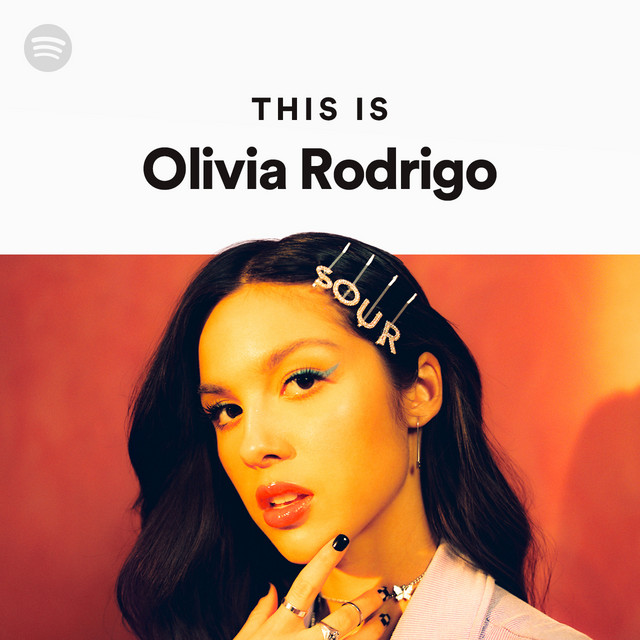

In [291]:
Image.open('/content/drive/MyDrive/Data Sets/oliva rodrigo.jpg')   # la cancion e interprete que aparece en top 20 según popularidad

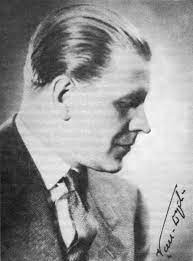

In [292]:
Image.open('/content/drive/MyDrive/Data Sets/Tadeusz Dolega Mostowicz.jpg') # en la caracteristica de Artists Tadeusz Dolega Mostowicz
                                                                            # corresponde a la moda (aquel que más veces aparece en el dataset).

Tadeusz Dołęga-Mostowicz fue un escritor, periodista y autor polaco de más de una docena de novelas populares.
Por lo tanto el artista que aparece como moda en el dataset corresponde a una lista de reproducciones de relatos cortos, poesía y demás, muy distinto a lo que podría suponerse como un artista moderno.

(https://en.wikipedia.org/wiki/Tadeusz_Do%C5%82%C4%99ga-Mostowicz)

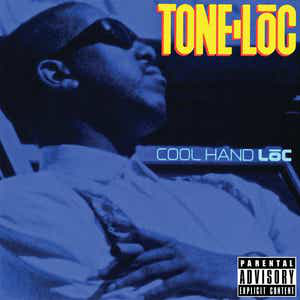

In [293]:
Image.open('/content/drive/MyDrive/Data Sets/tone loc.jpg')   # la canción y el interprete que aparece en top 20 según Danceability

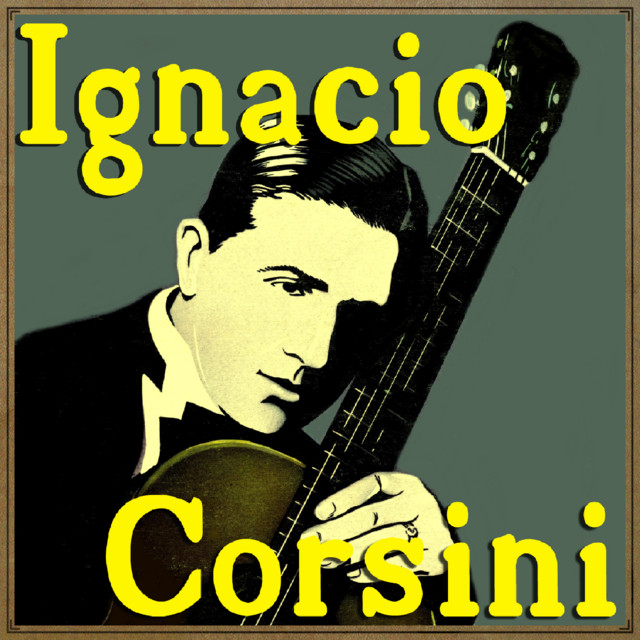

In [294]:
Image.open('/content/drive/MyDrive/Data Sets/ignacio corsini spotify.jpg')   # En el caso de la caracteristica de Acousticness la canción Mentiras de Ignacio Corsini
                                                                             # aparece como la número 1

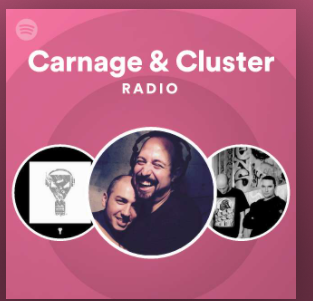

In [295]:
Image.open('/content/drive/MyDrive/Data Sets/carnage and cluster.PNG')   # Carnage y Cluster aparecen en el top por la carecteristica de Energy
                                                                          # cancion Oppressed Masses - 2018 Remaster	

##Recomendaciones

**Caracteristica a considerar a futuro**

El dataset podría haber incluido una caracteristica de **genero musical**, con esto se lograría un agrupamiento de los datos según el genero musical.
Esto podría permitir asignar relaciones entre las otras caracteristiscas a cada genero musical.


**Recomendaciones Musicales**

Se pueden realizar recomendaciones musicales o playlist por algunas caracteristicas que presenten las canciones que el usuario escuche, si por casualidad el usario tiende a escuchar musica actual pero con caracteristicas de acustics, entonces se le puede recomendar algunas acustic greathits por épocas, si el usuario se interesa más por caracteristicas con Danceability, entonces la App puede recomendarle canciones Mix Dance.